## First look at advective and diffuisive fluxes from model output

This notebook is a first look at the model's diffusive and advective fluxes form the diagnostics package.
Frequency of output is 43200 s (half a day) and the size of the fields is 360x360x90x20.

Filename: Flux_TH (Theta), Flux_SLT (salinity)

| Variable   |   Units         | Description  | Coordinates  | Size                  |
|------------|:---------------:|-------------:|:-------------|:---------------------:|:--------------------------:
| ADVr_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Advective Flux of Pot.Temperature|(T, Z, Y, X) | (16,90,360,360)
| ADVx_TH     | $^{\circ}C m^3s^{-1}$ | Zonal Advective Flux of Pot.Temperature | (T, Z, Y, Xp1) | (16,90,360,361)
| ADVy_TH     | $^{\circ}C m^3s^{-1}$ | Meridional Advective Flux of Pot.Temperature|(T, Z, Yp1, X) | (16,90,361,360)
| DFrE_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Diffusive Flux of Pot.Temperature (Explicit part)|(T, Z, Y, X) | (16,90,360,360)
| DFxE_TH     | $^{\circ}C m^3s^{-1}$ | Zonal      Diffusive Flux of Pot.Temperature|(T, Z, Y, Xp1) | (16,90,360,361)
| DFyE_TH     | $^{\circ}C m^3s^{-1}$ | Meridional Diffusive Flux of Pot.Temperature|(T, Z, Yp1, X) | (16,90,361,360)
| DFrI_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Diffusive Flux of Pot.Temperature (Implicit part)|(T, Z, Y, X) | (16,90,360,360)   

Same for salinity.

For passive tracers, there are 3 extra fields besides these fluxes. Units correspond to what I entered as units in data.ptracers but it really doesn't matter.

Filename: FluxTR01, FluxTr02 

| Variable    |   Units                       | Description  | Coordinates           | Size                      |
|------------ |:----------------------------: |:-------------|:---------------------:|:--------------------------:
| UTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Zonal Mass-Weighted Transp of Tr01   | (T, Z, Y, Xp1) | (16,90,360,361)
| VTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Meridional Mass-Weighted Transp of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| WTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Vertical Mass-Weighted Transp of Tr01|(T, Z, Y, X) | (16,90,360,360)
| ADVrTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Vertical Advective Flux of Tr01|(T, Z, Y, X) | (16,90,360,360)
| ADVxTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Zonal Advective Flux of Tr01 |(T, Z, Y, Xp1) | (16,90,360,361)
| ADVyTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Meridional Advective Flux of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| DFrETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Vertical Diffusive Flux of Tr01 (Explicit part)|(T, Z, Y, X)| (16,90,360,360)
| DFxETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Zonal      Diffusive Flux of Tr01|(T, Z, Y, Xp1) | (16,90,360,361)
| DFyETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Meridional Diffusive Flux of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| DFrITr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Vertical Diffusive Flux of Tr01 (Implicit part)| (T, Z, Y, X) | (16,90,360,360) 
 


In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [4]:
CanyonGrid='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
CanyonState='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

FluxTH = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTHGlob.nc'
FluxSLT = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxSLTGlob.nc'
FluxTR01 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTR01Glob.nc'
FluxTR02 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTR02Glob.nc'
FluxOut = Dataset(FluxTR02)


In [5]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Times = CanyonStateOut.variables['T']
TimesFlux = FluxOut.variables['T']

#print(TimesFlux[:])
xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells (Y,X)
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells (Y,X)

xp1 = rout.getField(CanyonGrid, 'XG') # x coords vorticity cells (Yp1,Xp1)
yp1 = rout.getField(CanyonGrid, 'YG') # y coords vorticity cells (Yp1,Xp1)

drF = CanyonGridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(CanyonGrid,'dxG')
bathy = rout.getField(CanyonGrid, 'Depth')

rA = rout.getField(CanyonGrid, 'rA') # area of cells (x-y)

hFacC = rout.getField(CanyonGrid, 'HFacC') # (Z,Y,X) for vertical fluxes
MaskC = rout.getMask(CanyonGrid,'HFacC') 

hFacW = rout.getField(CanyonGrid, 'HFacW') # (Z,Y,Xp1) for zonal fluxes
MaskW = rout.getMask(CanyonGrid,'HFacW') 

hFacS = rout.getField(CanyonGrid, 'HFacS') # (Z,Yp1,X) for meridional fluxes
MaskS = rout.getMask(CanyonGrid,'HFacS') 


###Vertical fluxes within the canyon

See notebook TransportThroughBoxes.ipynb for definitions of the planes.

In [6]:
#Vertical Fluxes
ADVrTH = rout.getField(FluxTH,'ADVr_TH') # Vertical advective transport THETA
ADVrSLT = rout.getField(FluxSLT,'ADVr_SLT') # Vertical advective transport 
ADVrTR01 = rout.getField(FluxTR01,'ADVrTr01') # Vertical advective transport 
ADVrTR02 = rout.getField(FluxTR02,'ADVrTr02') # Vertical advective transport 


In [7]:
DFrITR01 = rout.getField(FluxTR01,'DFrITr01') # Vertical diff flux implicit
DFrETR01 = rout.getField(FluxTR01,'DFrETr01') # Vertical diff flux implicit


In [8]:
def pcolorFluxVCNY(times,figSize, numCols,numRows, Flux, Mask, depth,z,bathy,x,y,units ):
    ''' Pcolor plot of vertical flux at depth 'depth' 
     -------------------------------------------------------------------------------------------------------------------
     INPUT: times - list of time output to plot. E.g. times = [0,4,8,12,16] would plot the flux at days 0, 2, 4, 6 and 8
            figSize - touple with figure size. E.g. figsize = (20,18)
            numCols, numRows - integers indicating, respectively, the number of columns and rows to arrange the subplots into.
            Flux - array with flux data from MITgcm model. The shape should be (nt,nz,ny,nx)
            Mask - array with cell-center mask data.
            depth - integer indicating the z-level to plot
            z - 1D array with z-level depth data
            bathy - 2D array with bathymetry data
            x - alongshore coordinates (2D)
            y - across-shore corrdinates (2D)
            units - string with units for colorbar. E.g. units = '$molC\ m^{-1}\cdot m^3s^{-1}$' 
    OUTPUT : Nice pcolor plot
    ----------------------------------------------------------------------------------------------------------------------
    '''
    
    fig44 = plt.figure(figsize=figSize)
     
    kk = 1
    
   
    for tt in time:
        
        FluxV = np.ma.array(Flux[tt,depth,150:-100,:],mask=Mask[depth,150:-100,:])
        
        plt.subplot(numRows,numCols,kk)
        ax = plt.gca()
        
        CS = plt.contour(x[150:-100,:],y[150:-100,:],bathy[150:-100,:],[z[depth]],colors='k',linewidths=[2.25] )
        
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        plt.pcolor(x[150:-100,:],y[150:-100,:],FluxV,cmap = "RdYlBu_r")
        
        if abs(np.max(FluxV)) >= abs(np.min(FluxV)):
            pl.clim([-np.max(FluxV),np.max(FluxV)])
        else:
            pl.clim([np.min(FluxV),-np.min(FluxV)])
        
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(units,position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[depth],(tt/2.)+0.5))
        
        kk=kk+1
        


(18, 90, 360, 360)
(90, 360, 360)


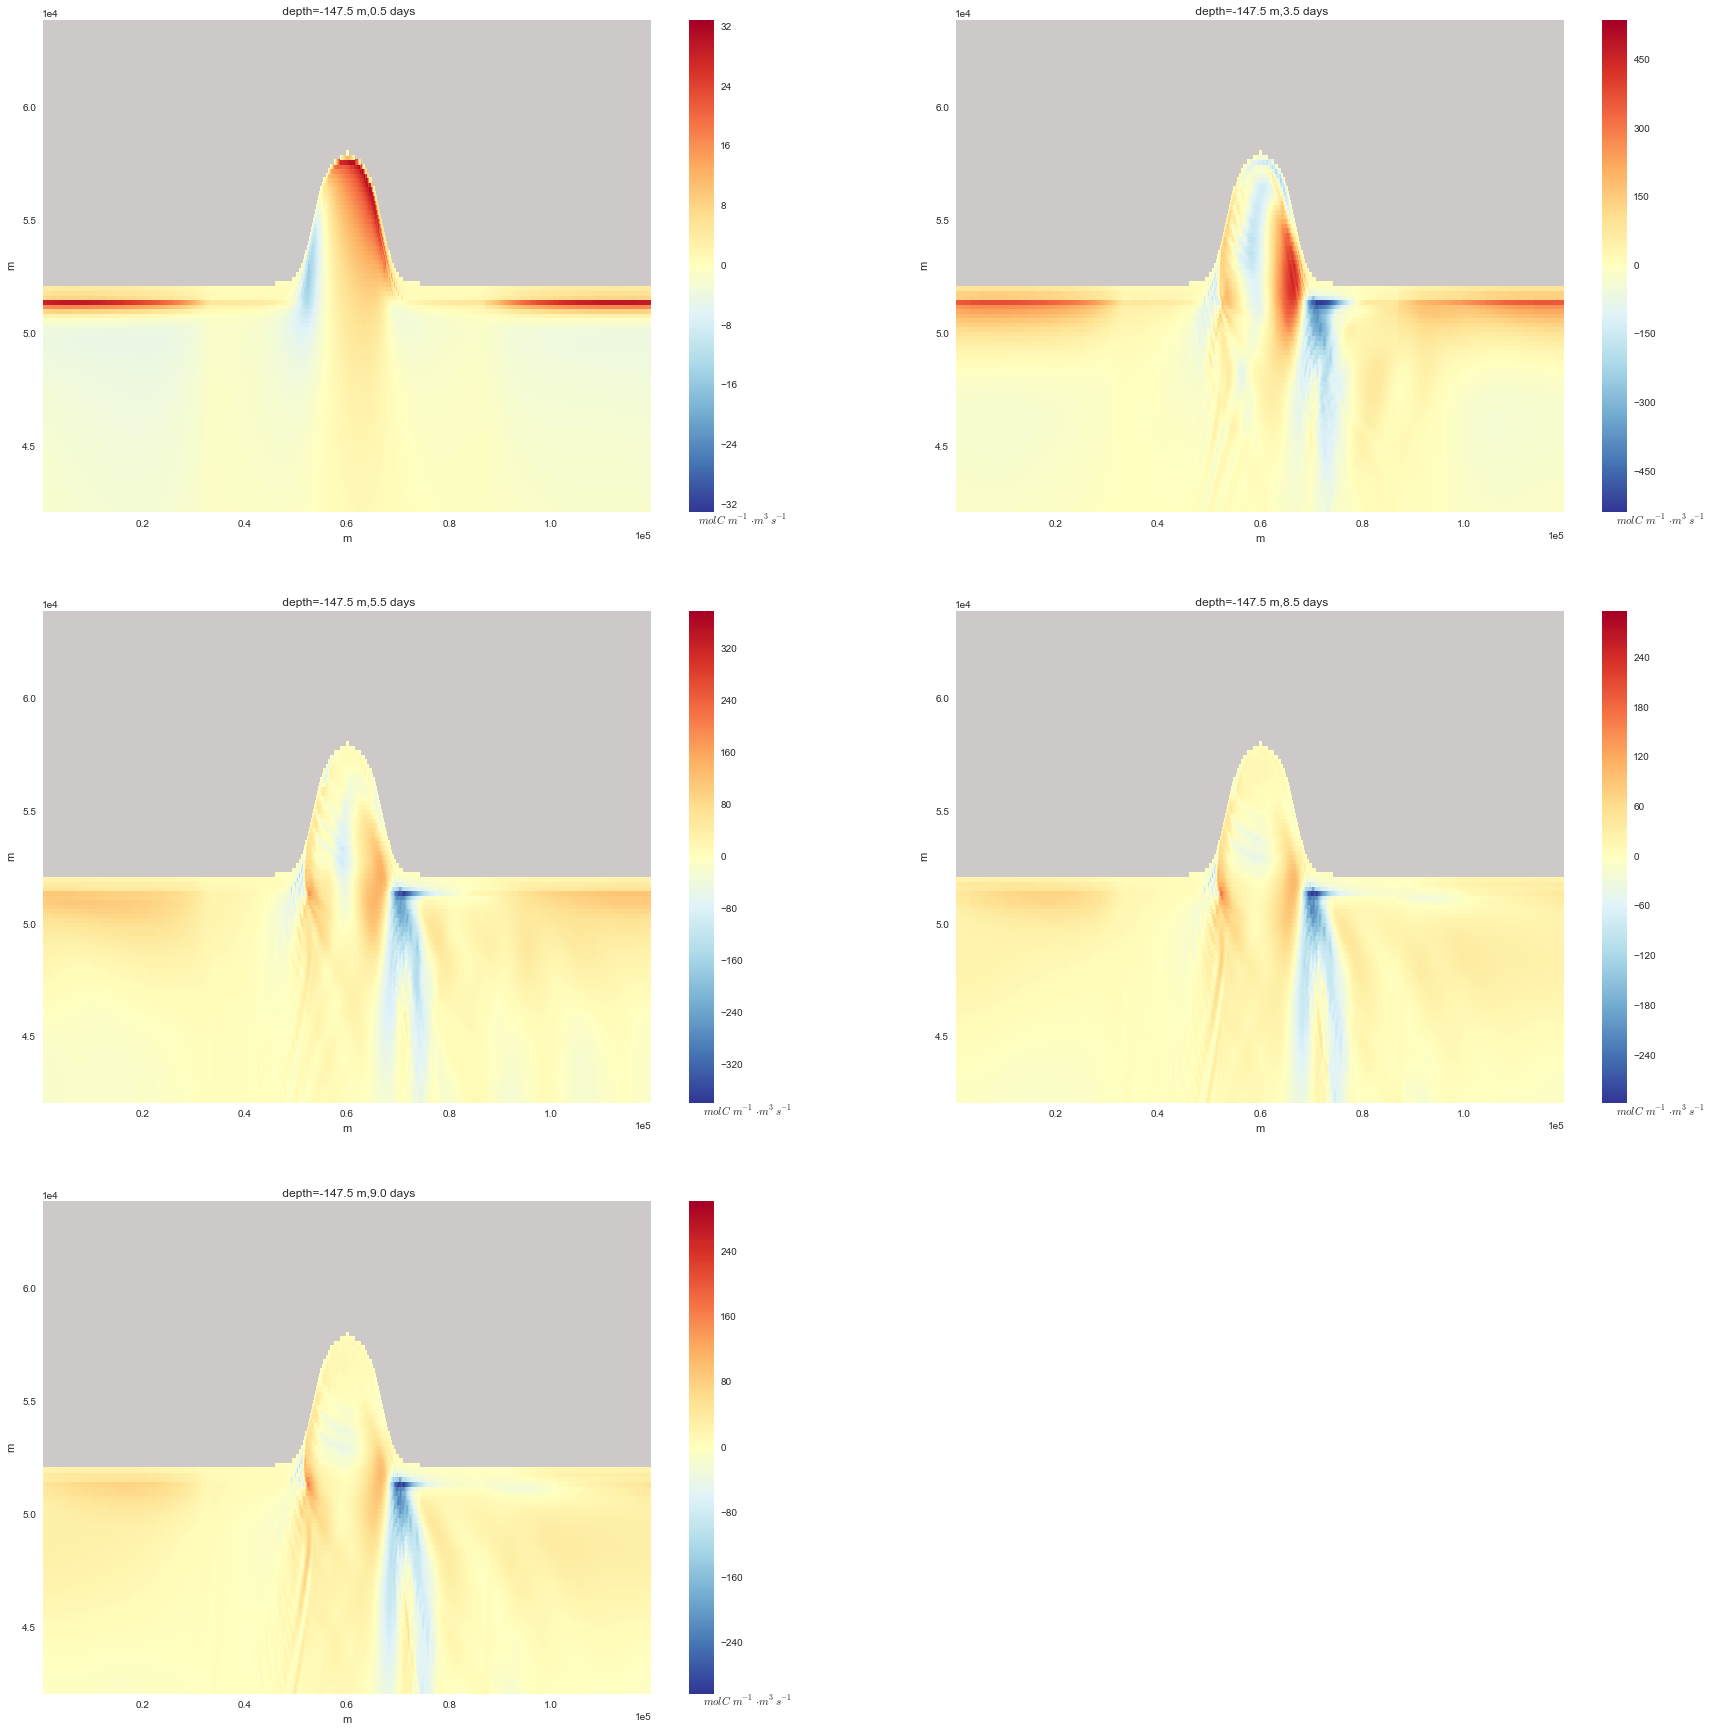

In [9]:
time = [0,6,10,16,17] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 29
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

print (np.shape(ADVrTR01))
print (np.shape(MaskC))

        
pcolorFluxVCNY(time,figSize, numCols,numRows,ADVrTR01, MaskC, depth,z,bathy,xc,yc,unitsTr)


(18, 90, 360, 360)
(90, 360, 360)


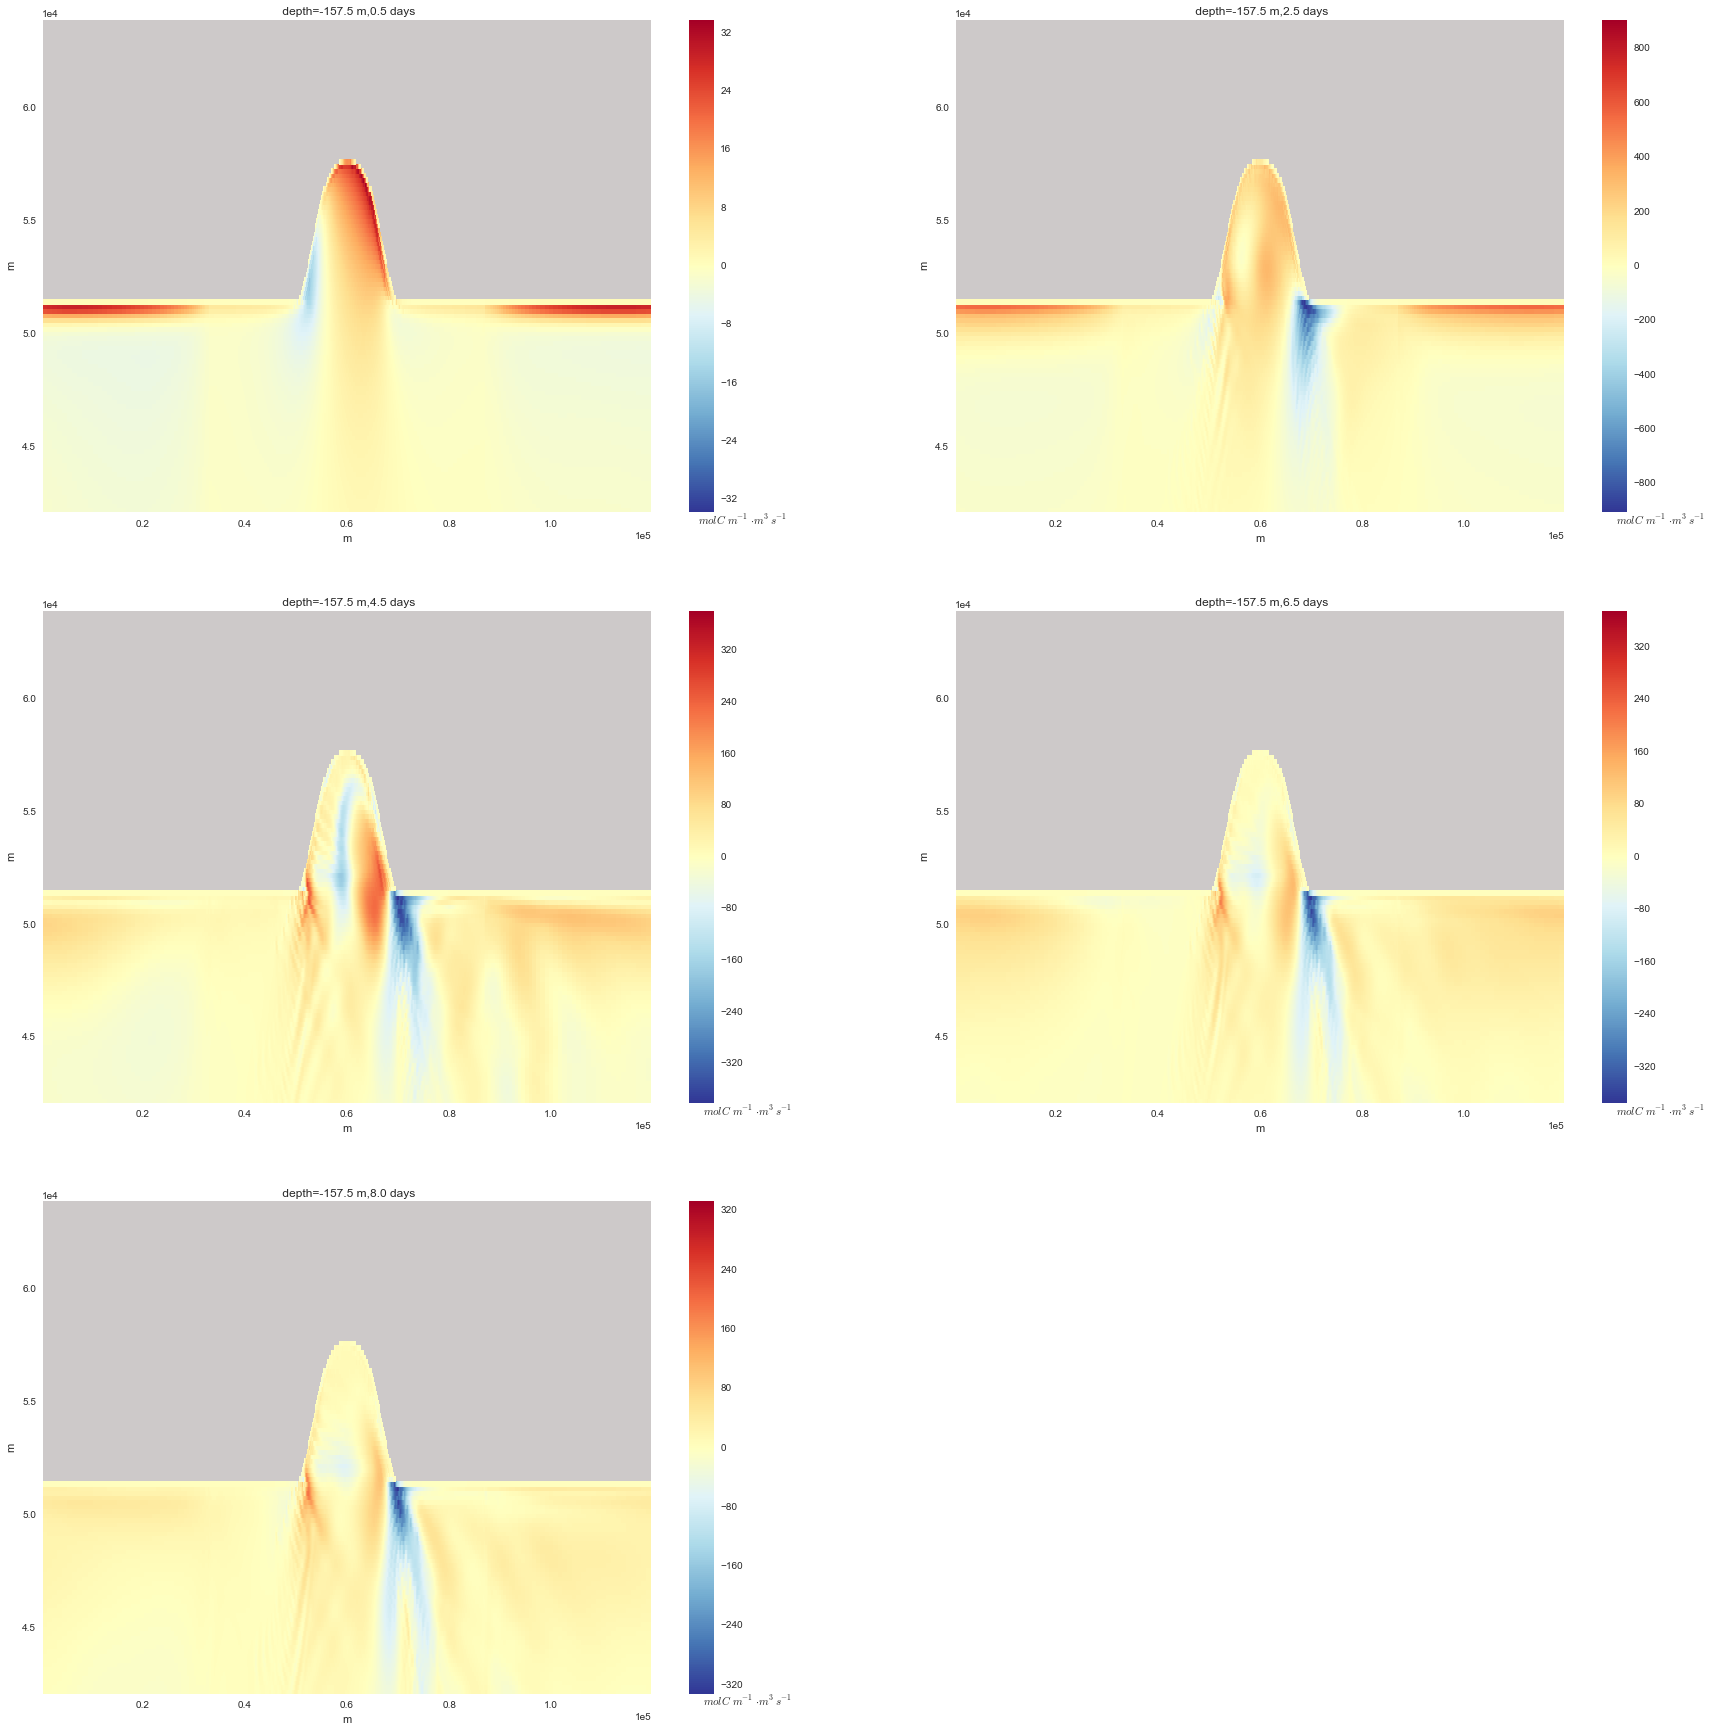

In [10]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 31
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

print (np.shape(ADVrTR01))
print (np.shape(MaskC))

        
pcolorFluxVCNY(time,figSize, numCols,numRows,ADVrTR01, MaskC, depth,z,bathy,xc,yc,unitsTr)


(18, 90, 360, 360)
(90, 360, 360)


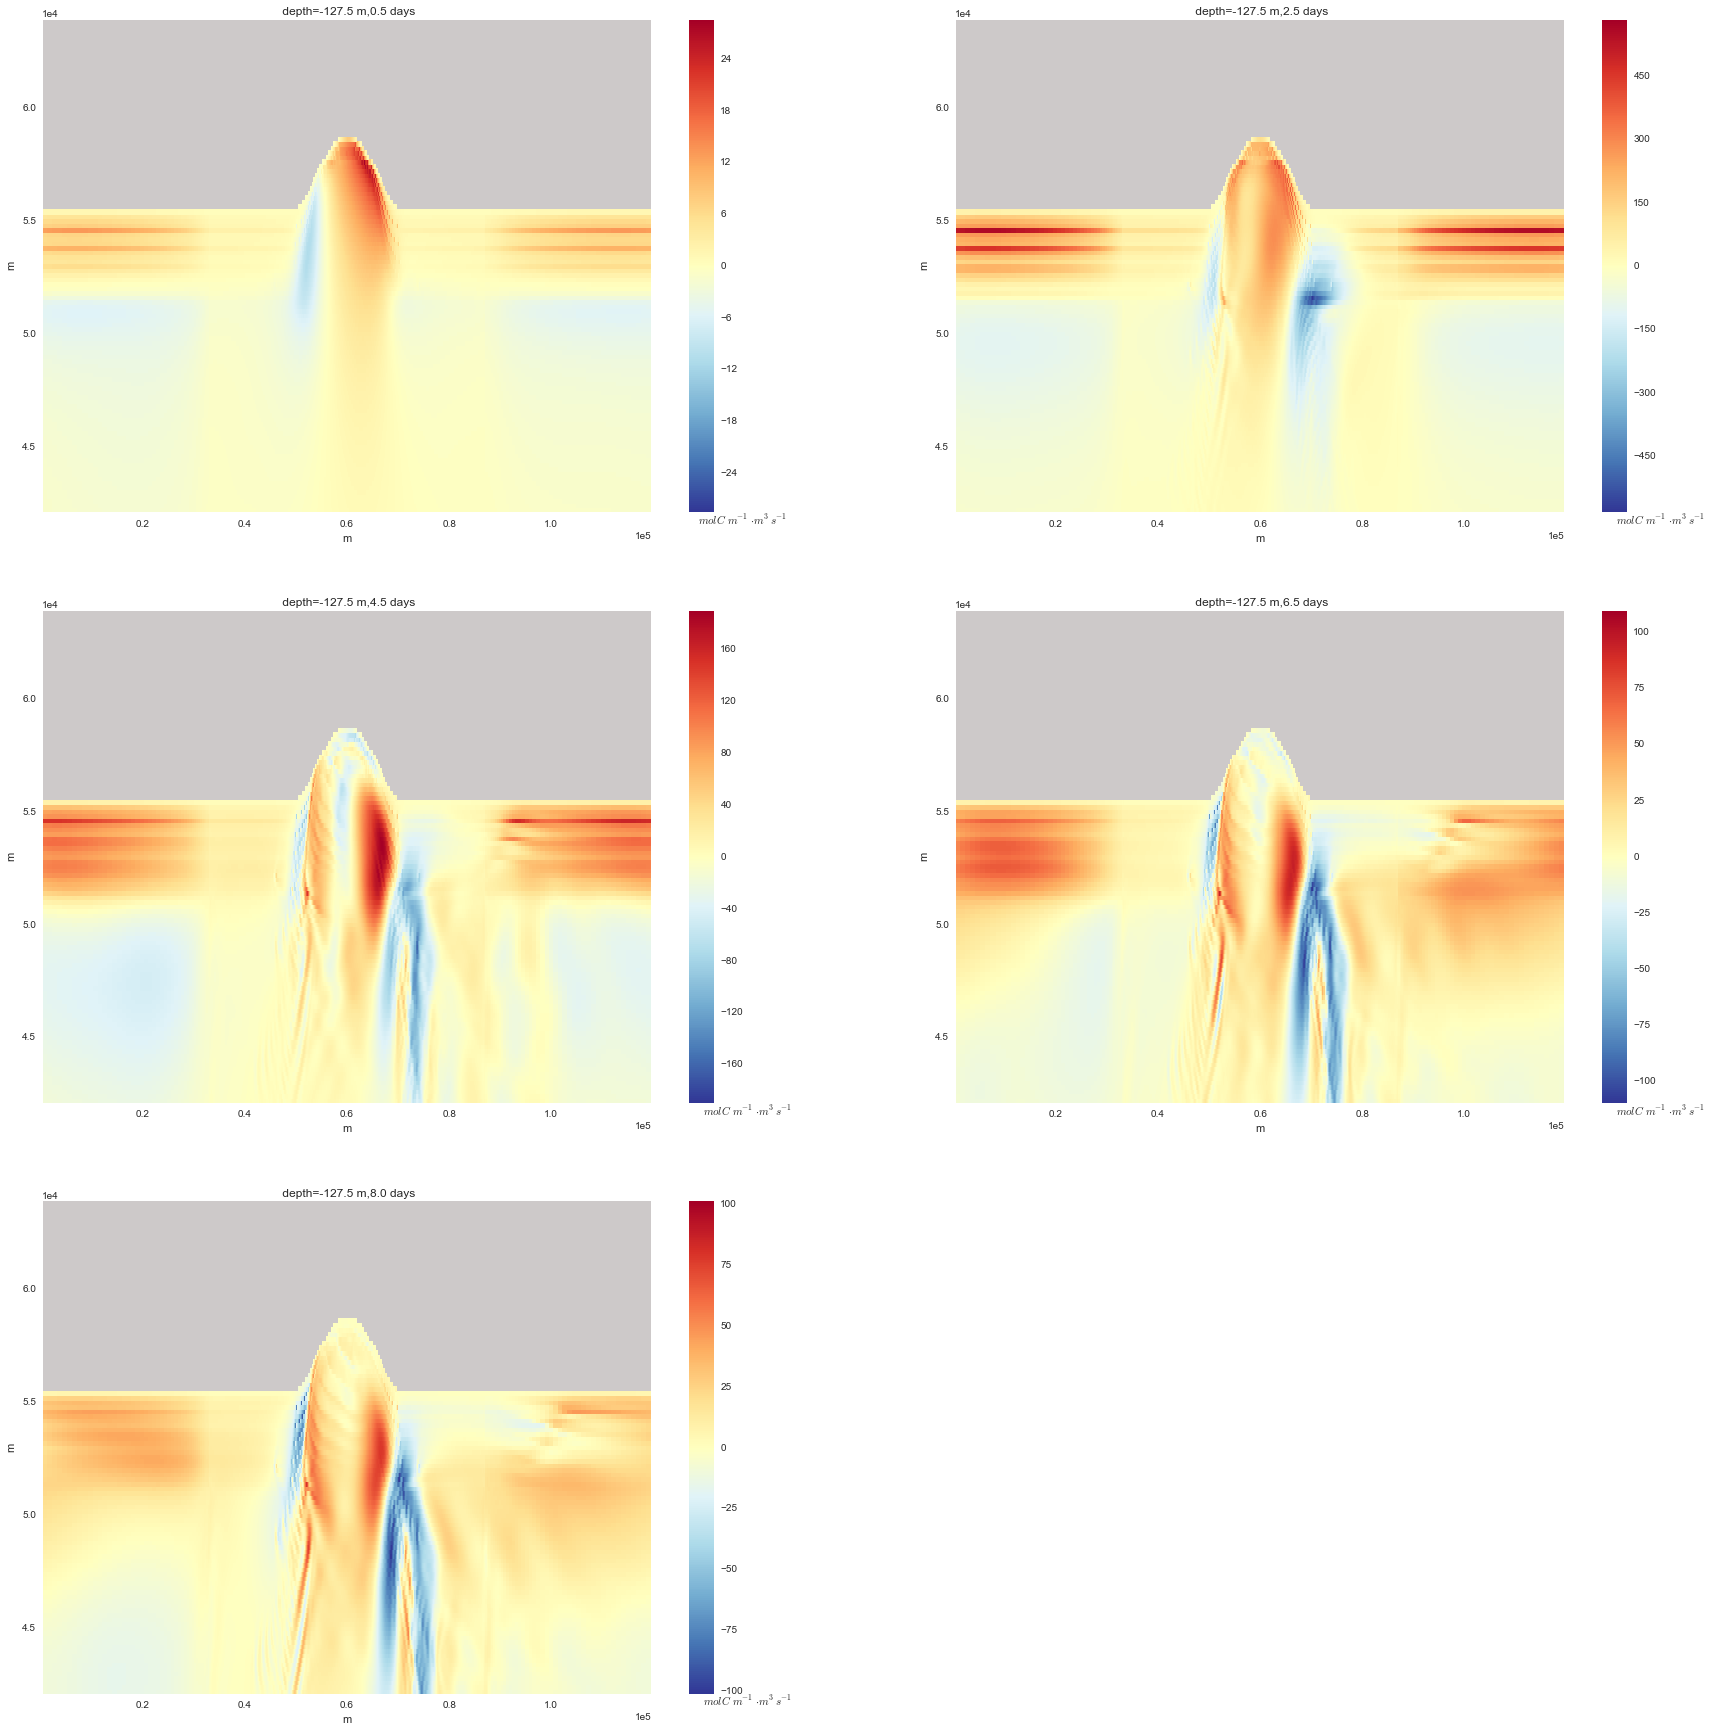

In [11]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 25
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

print (np.shape(ADVrTR01))
print (np.shape(MaskC))

        
pcolorFluxVCNY(time,figSize, numCols,numRows,ADVrTR01, MaskC, depth,z,bathy,xc,yc,unitsTr)


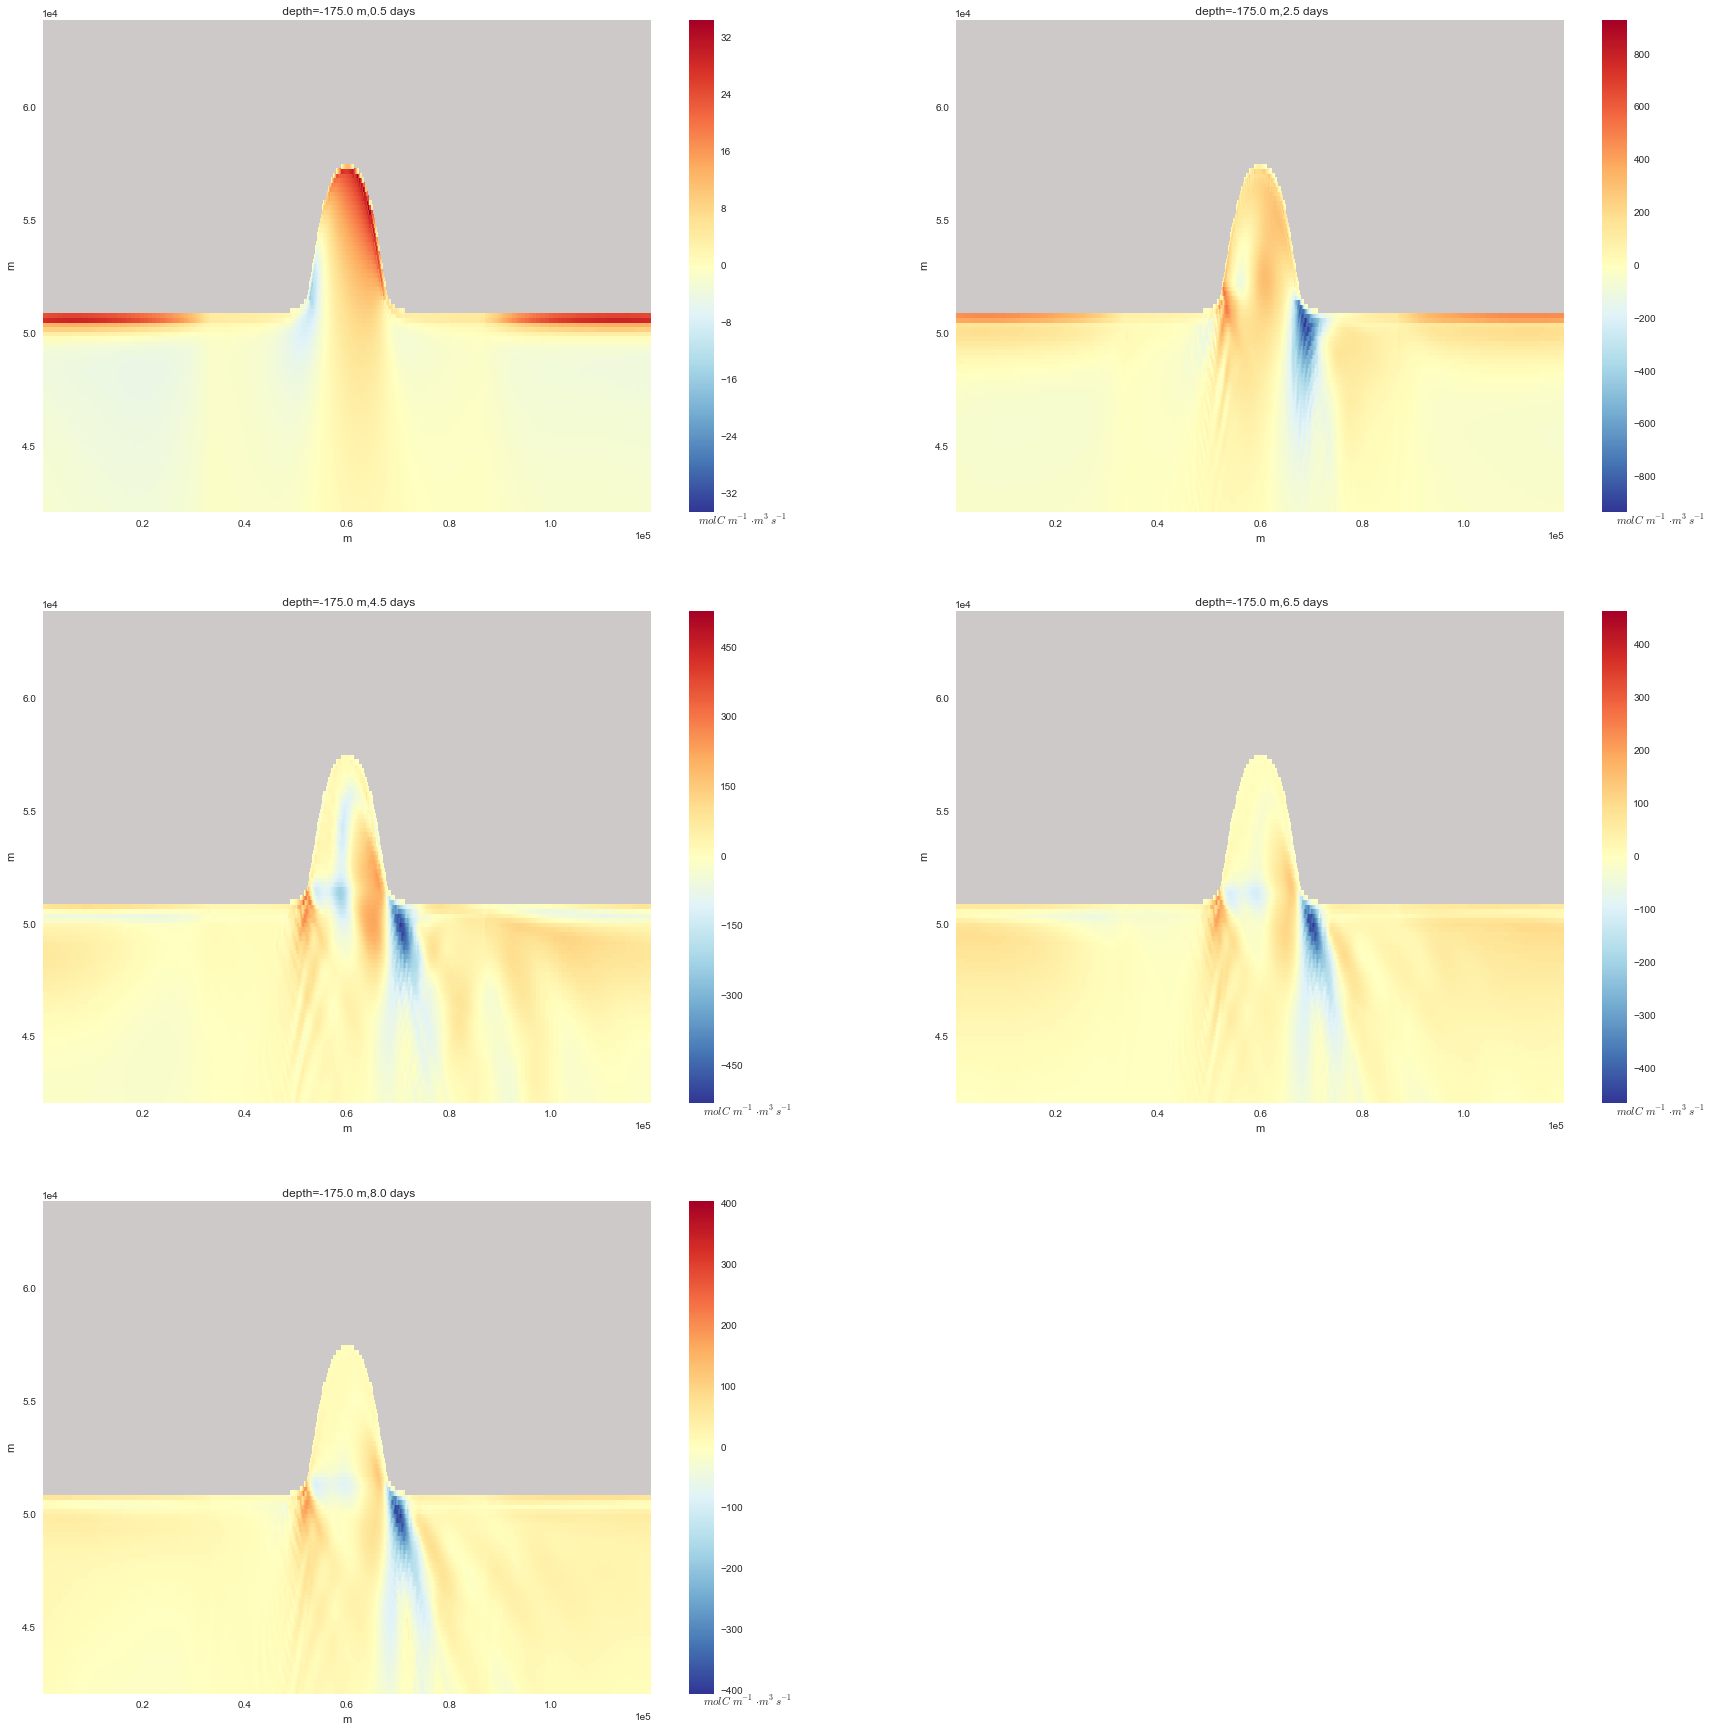

In [12]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 34
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,ADVrTR01, MaskC, depth,z,bathy,xc,yc,unitsTr)


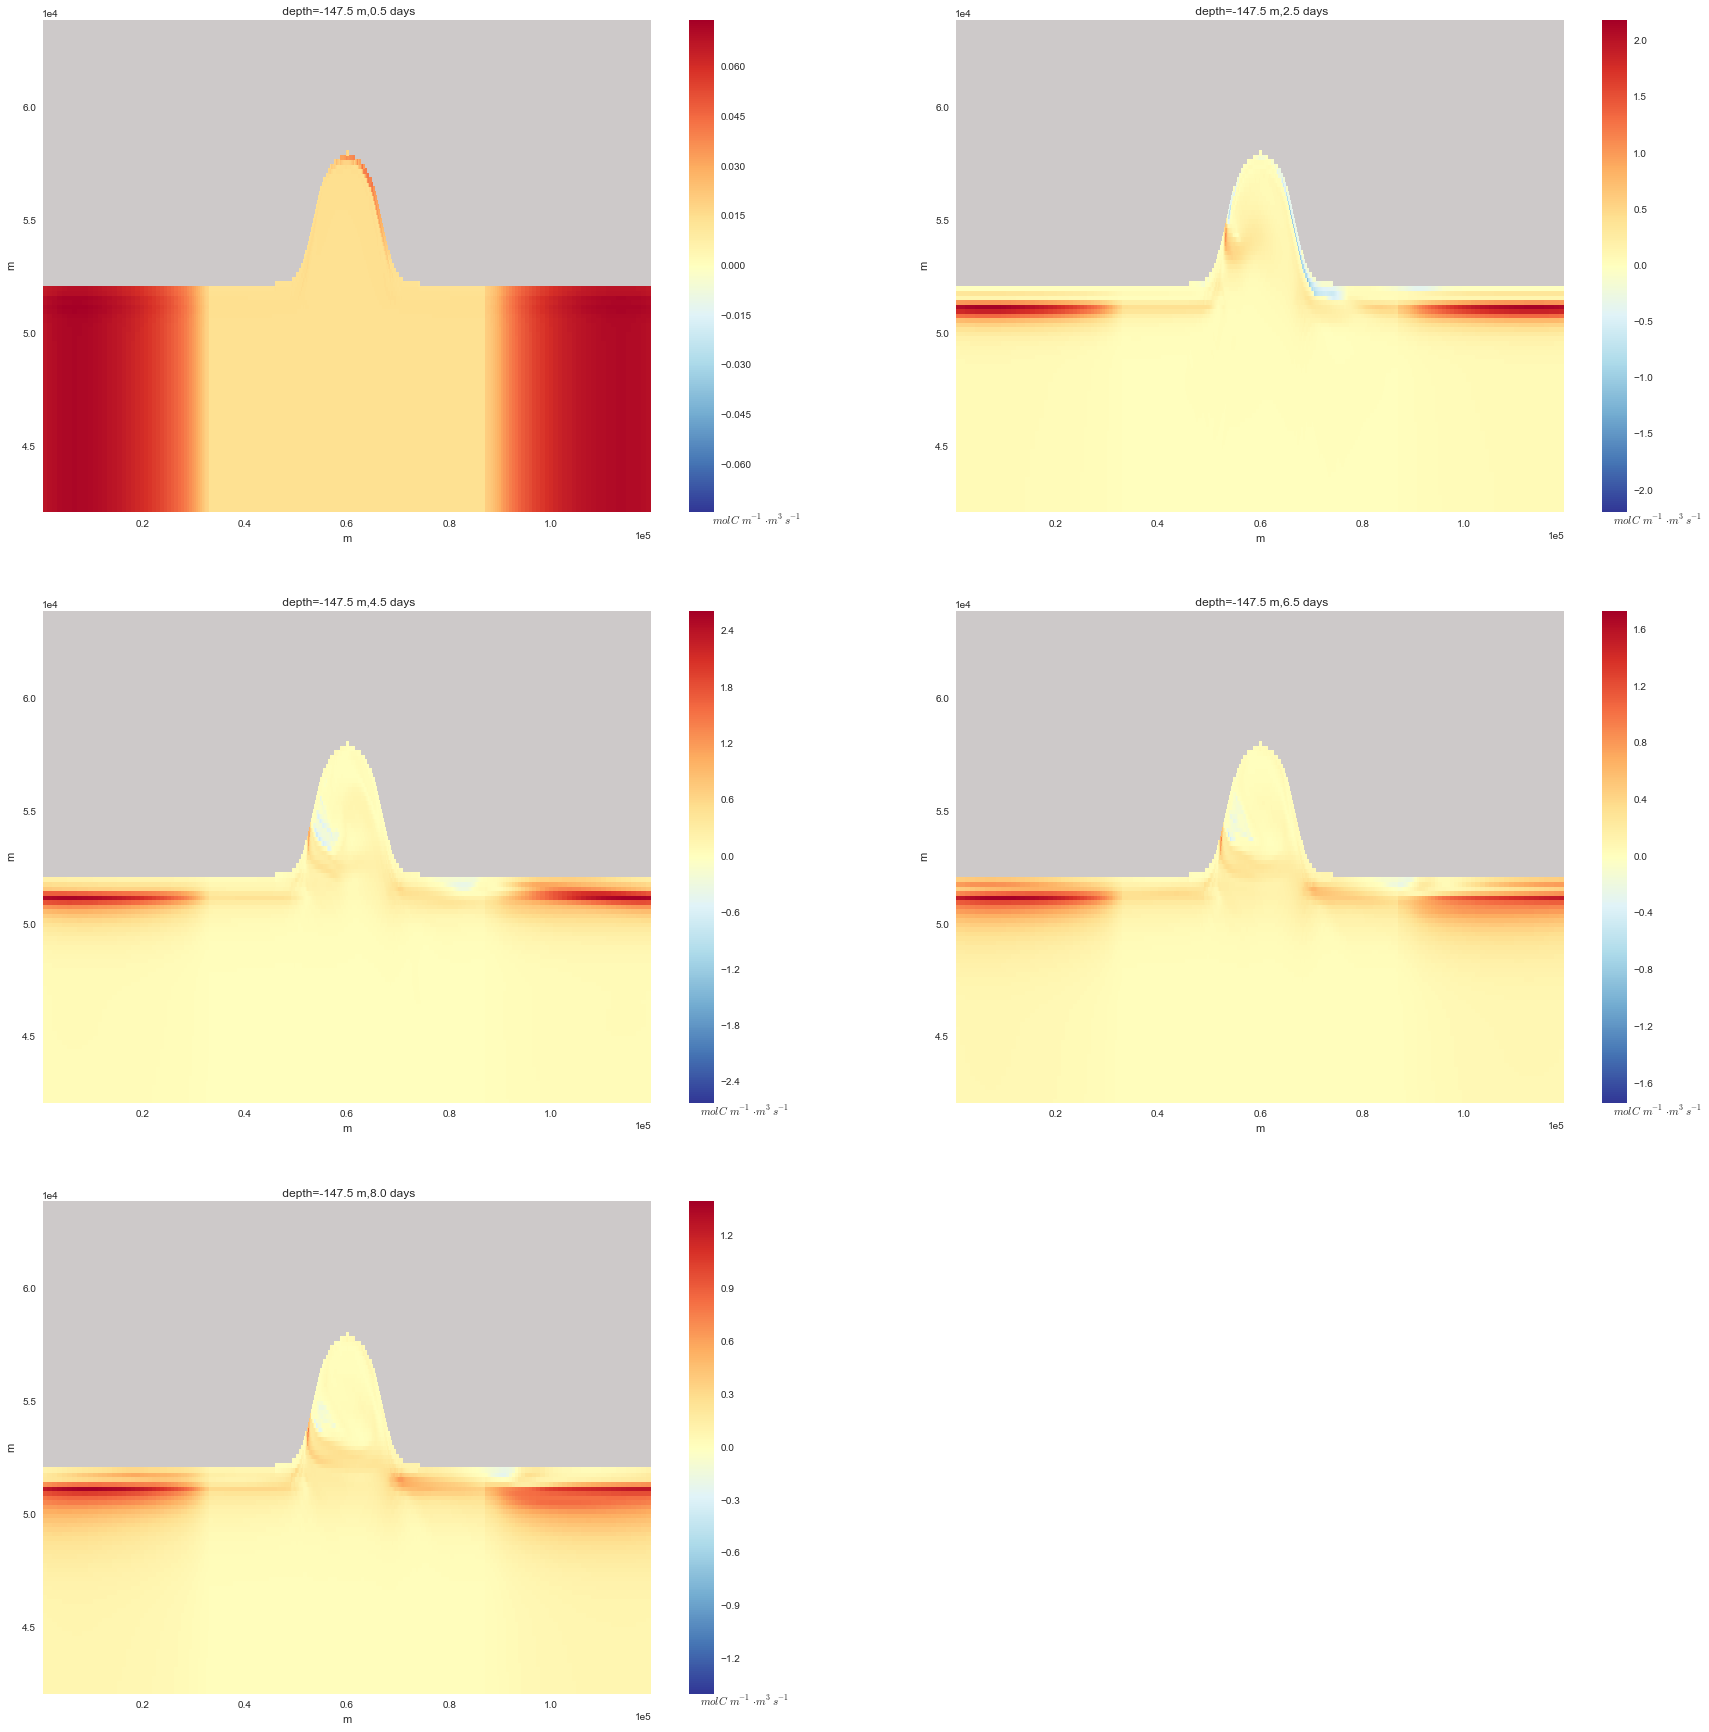

In [13]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 29
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,DFrITR01, MaskC, depth,z,bathy,xc,yc,unitsTr)
#plt.plot(xc[:,:],yc[:,:],'k--',linewidth=1.5 )


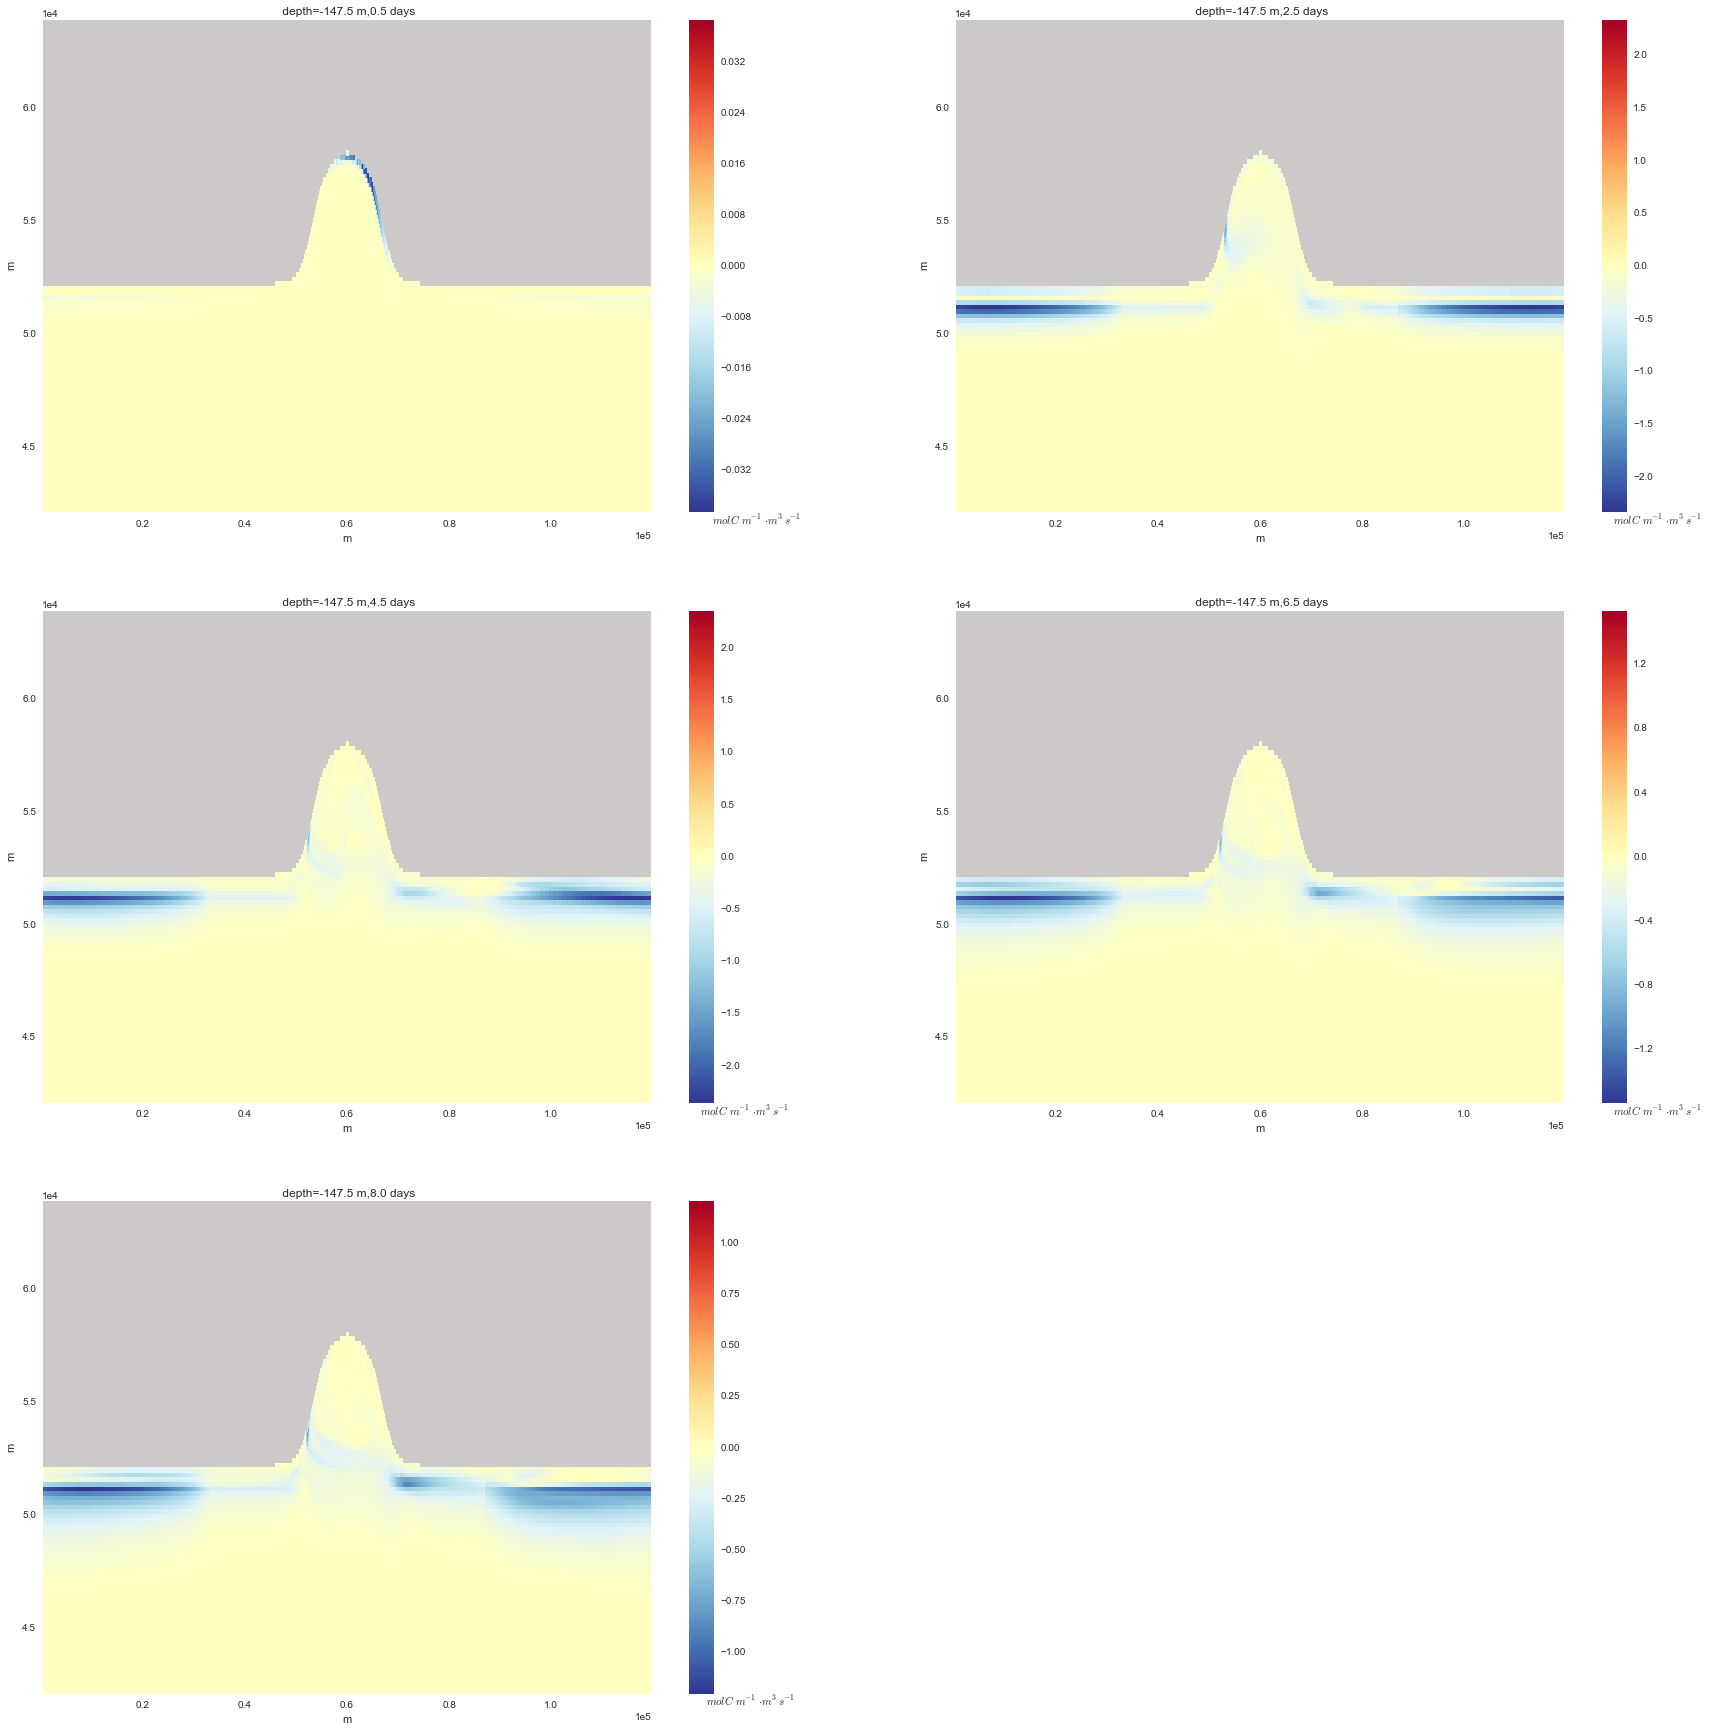

In [14]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 29
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,DFrETR01, MaskC, depth,z,bathy,xc,yc,unitsTr)


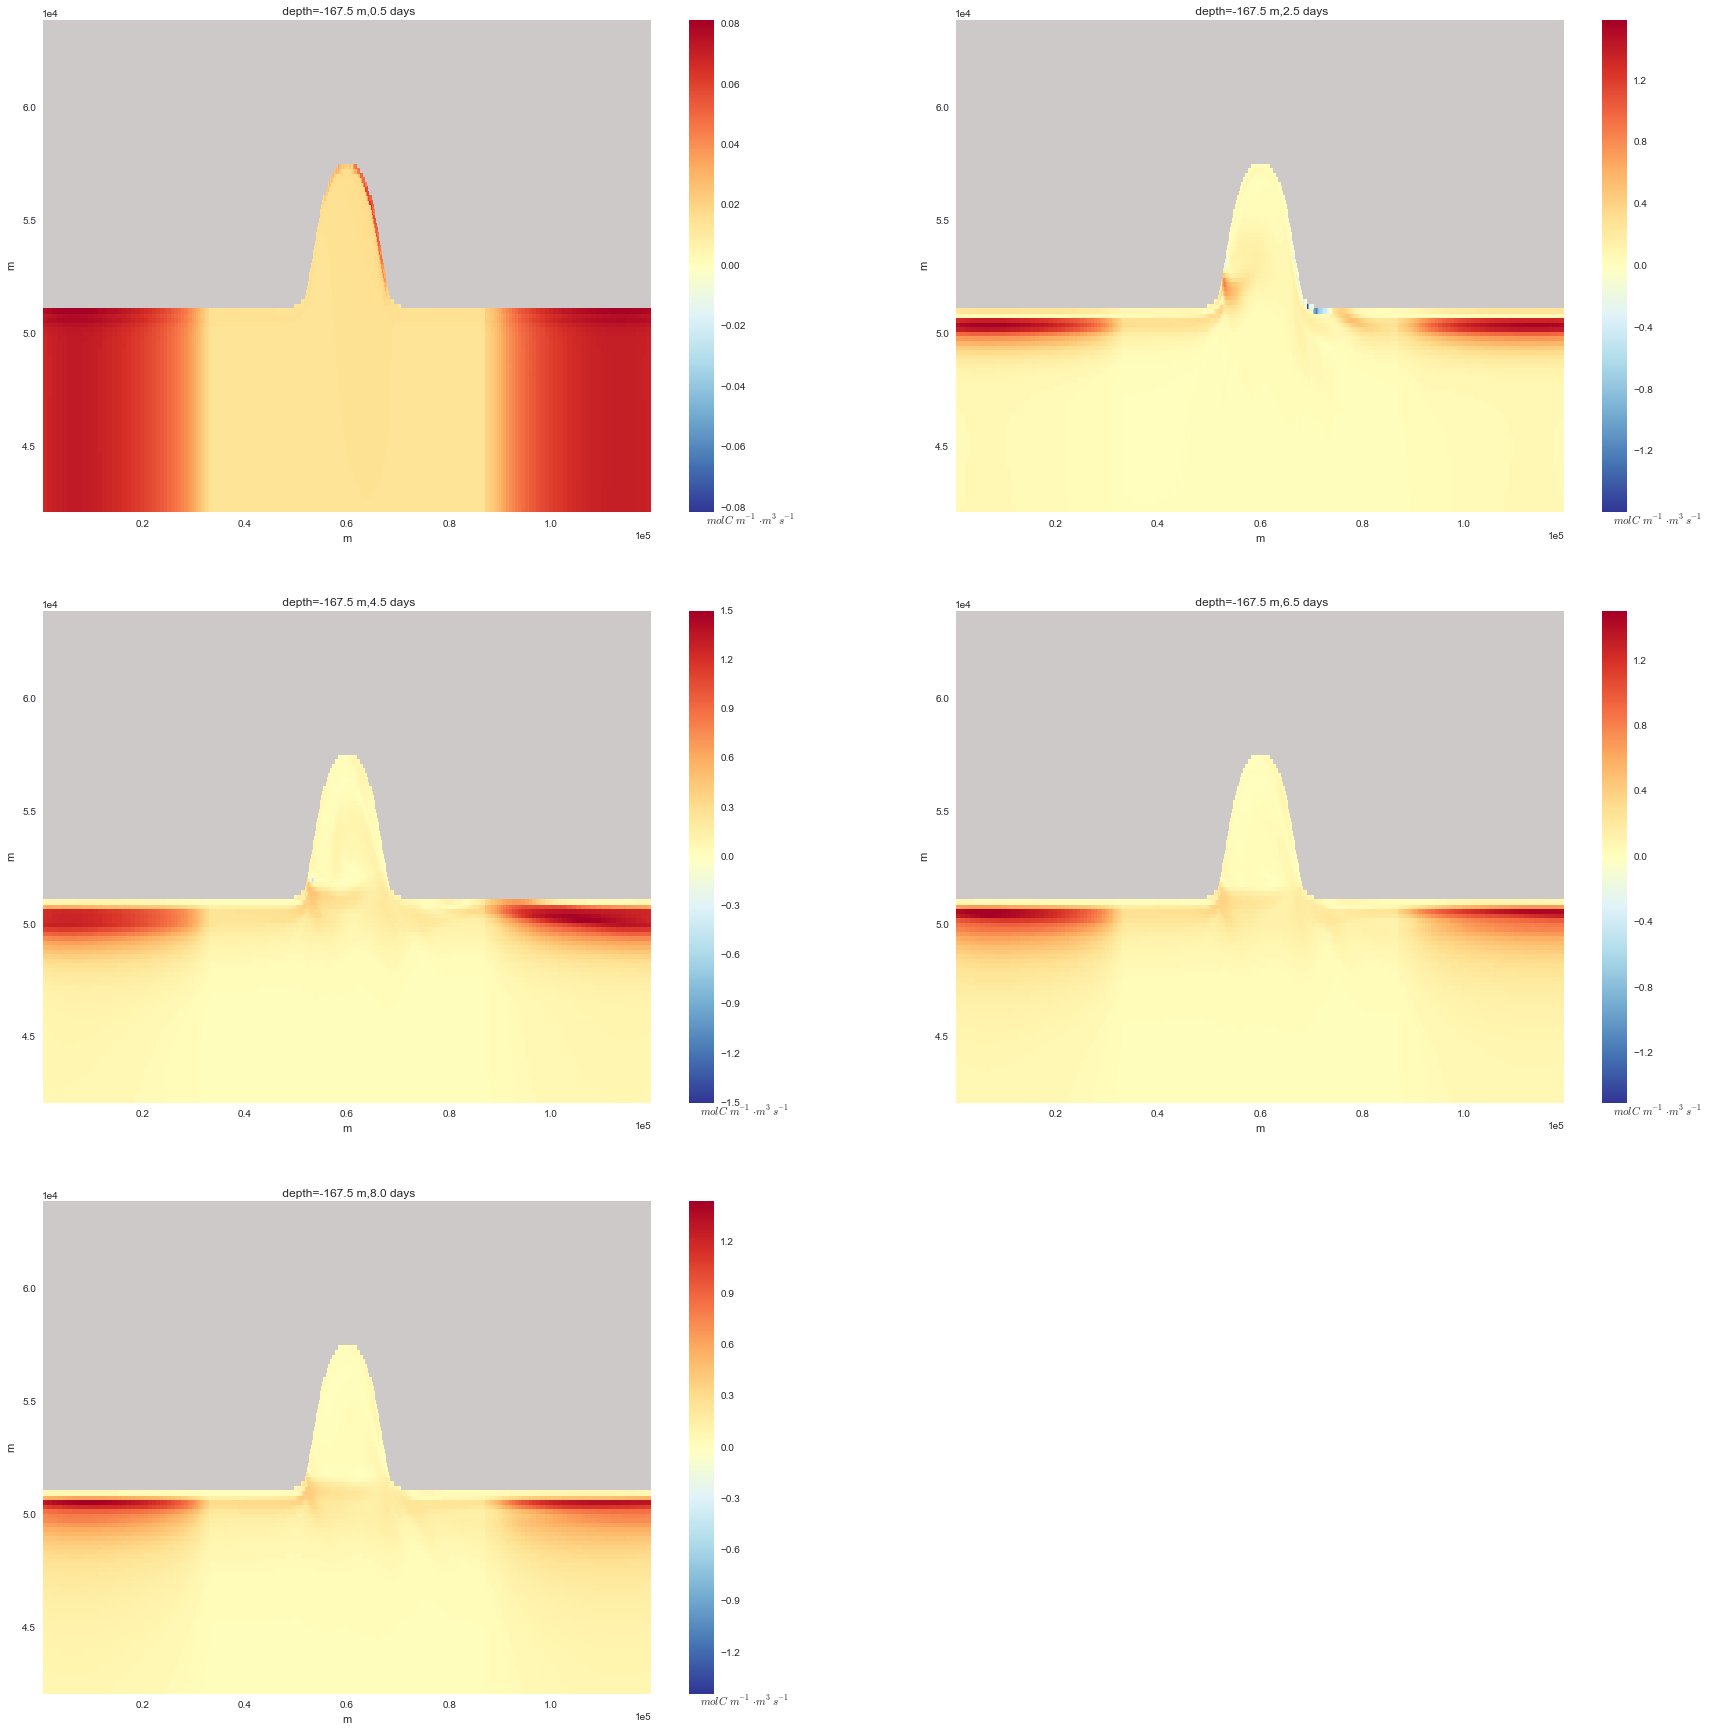

In [15]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 33
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,DFrITR01, MaskC, depth,z,bathy,xc,yc,unitsTr)

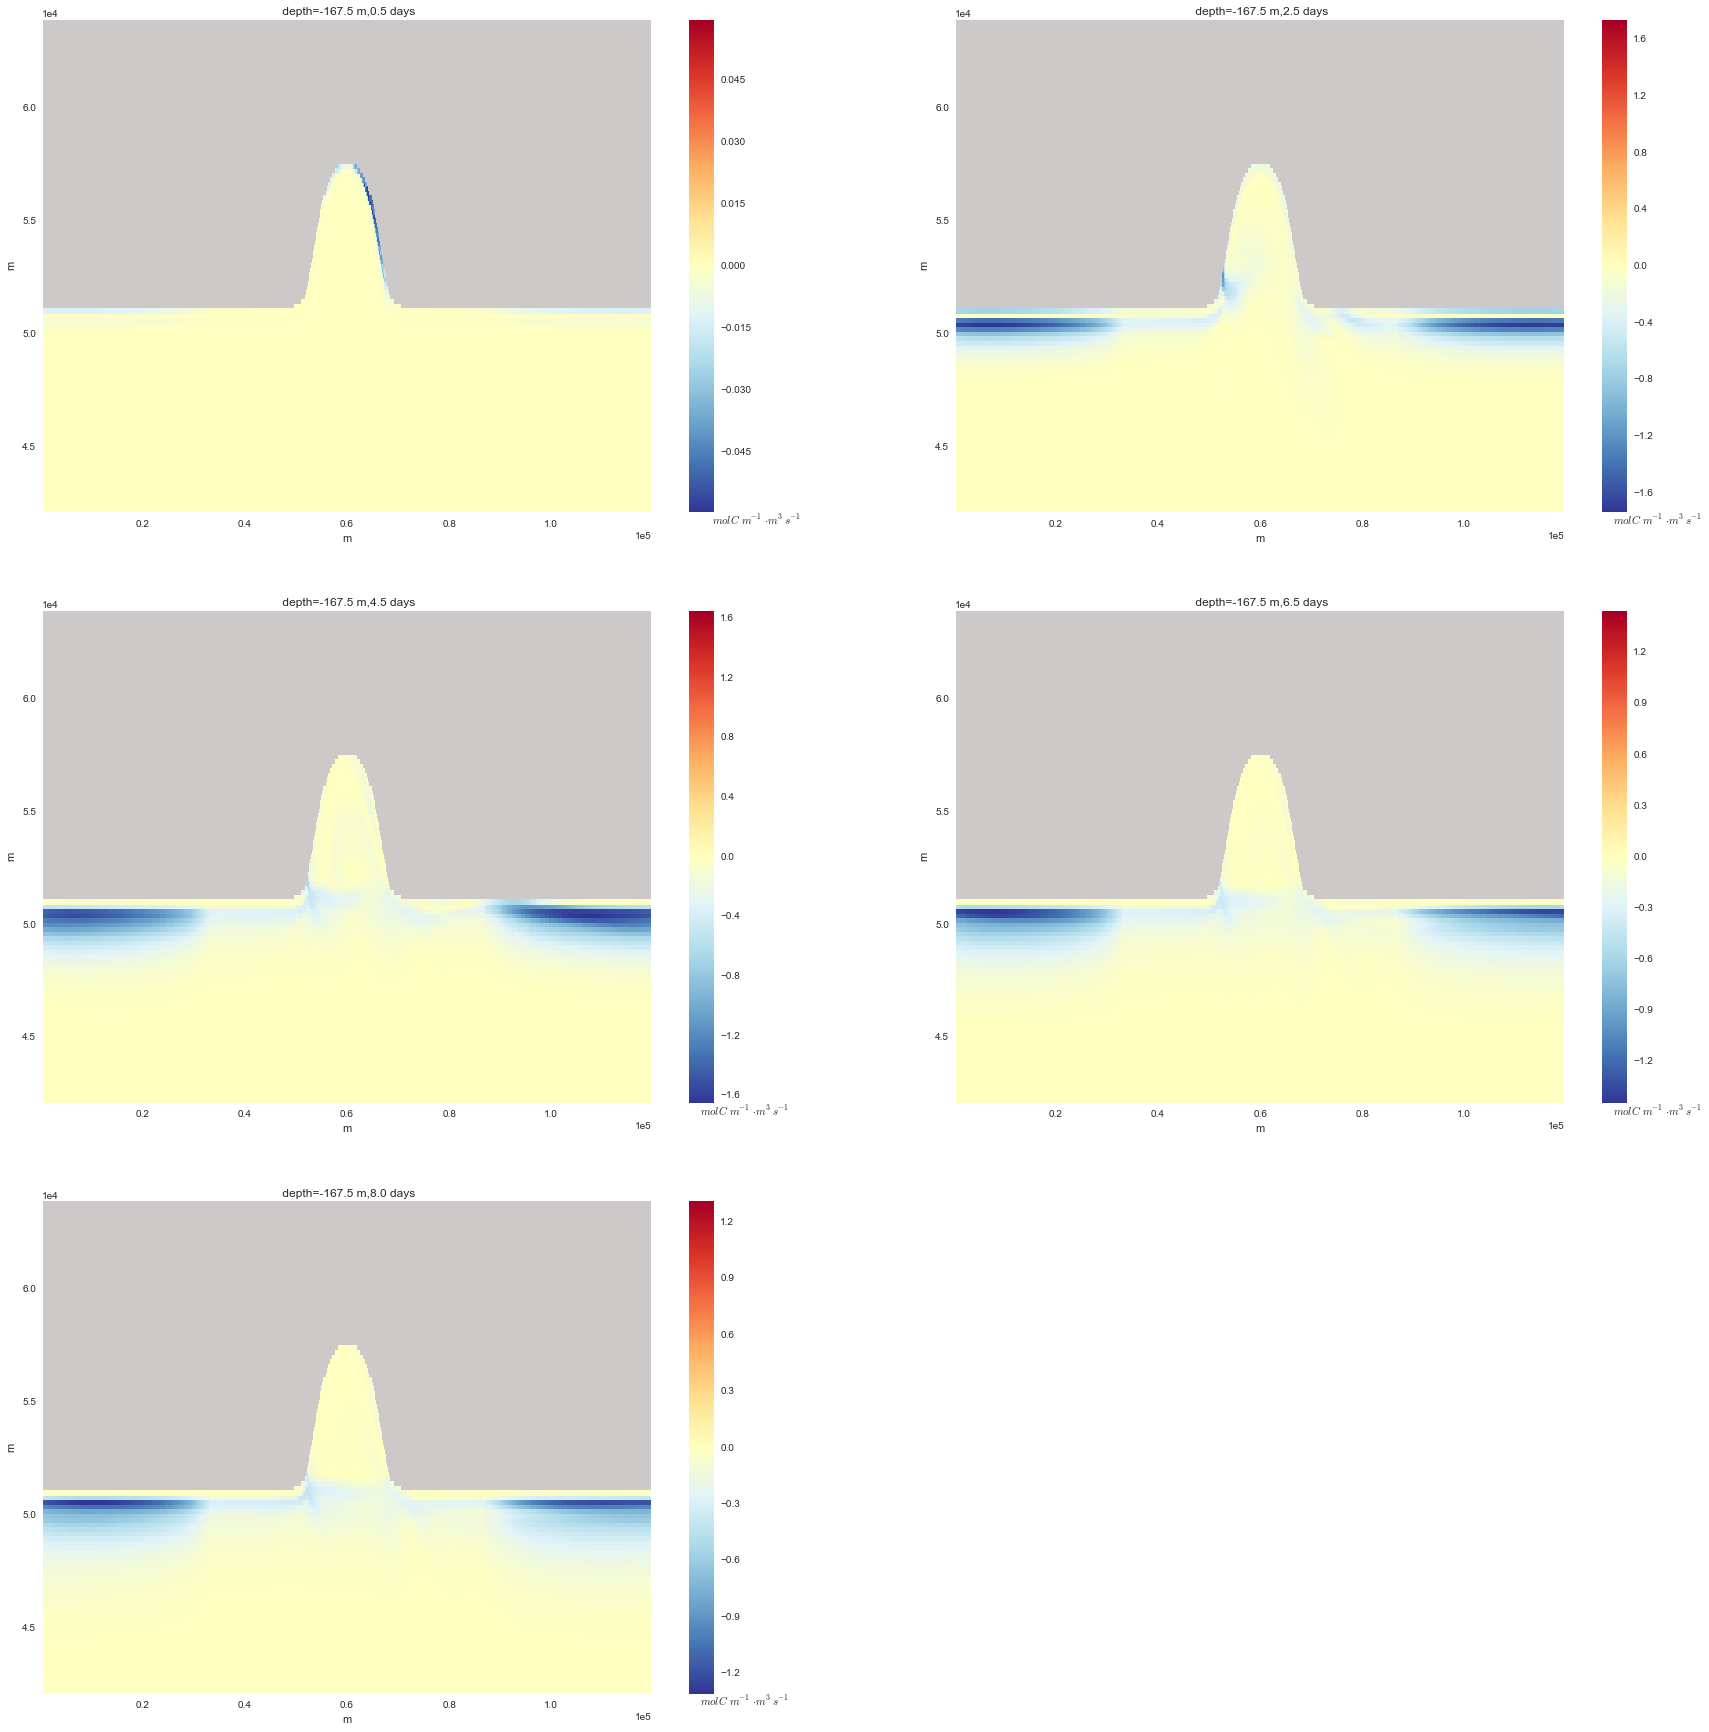

In [16]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 33
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,DFrETR01, MaskC, depth,z,bathy,xc,yc,unitsTr)

In [17]:
def pcolorFluxVCNYAcross(times,figSize, numCols,numRows, Flux, Mask, yindex ,z,bathy,x,y,units ):
    ''' Pcolor plot of vertical flux at depth 'depth' 
     -------------------------------------------------------------------------------------------------------------------
     INPUT: times - list of time output to plot. E.g. times = [0,4,8,12,16] would plot the flux at days 0, 2, 4, 6 and 8
            figSize - touple with figure size. E.g. figsize = (20,18)
            numCols, numRows - integers indicating, respectively, the number of columns and rows to arrange the subplots into.
            Flux - array with flux data from MITgcm model. The shape should be (nt,nz,ny,nx)
            Mask - array with cell-center mask data.
            yindex - integer indicating the y-distance index to plot
            z - 1D array with z-level depth data
            bathy - 2D array with bathymetry data
            x - alongshore coordinates (2D)
            y - across-shore corrdinates (2D)
            units - string with units for colorbar. E.g. units = '$molC\ m^{-1}\cdot m^3s^{-1}$' 
    OUTPUT : Nice pcolor plot
    ----------------------------------------------------------------------------------------------------------------------
    '''
    
    fig44 = plt.figure(figsize=figSize)
     
    kk = 1
    
   
    for tt in time:
        
        FluxV = np.ma.array(Flux[tt,:,yindex,:],mask=Mask[:,yindex,:])
        
        plt.subplot(numRows,numCols,kk)
        ax = plt.gca()
    
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        plt.pcolor(x[yindex,:],z[:],FluxV,cmap = "RdYlBu_r")
        
        if abs(np.max(FluxV)) >= abs(np.min(FluxV)):
            pl.clim([-np.max(FluxV),np.max(FluxV)])
        else:
            pl.clim([np.min(FluxV),-np.min(FluxV)])
        
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(units,position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (y[yindex,3],(tt/2.)+0.5))
        
        kk=kk+1
        


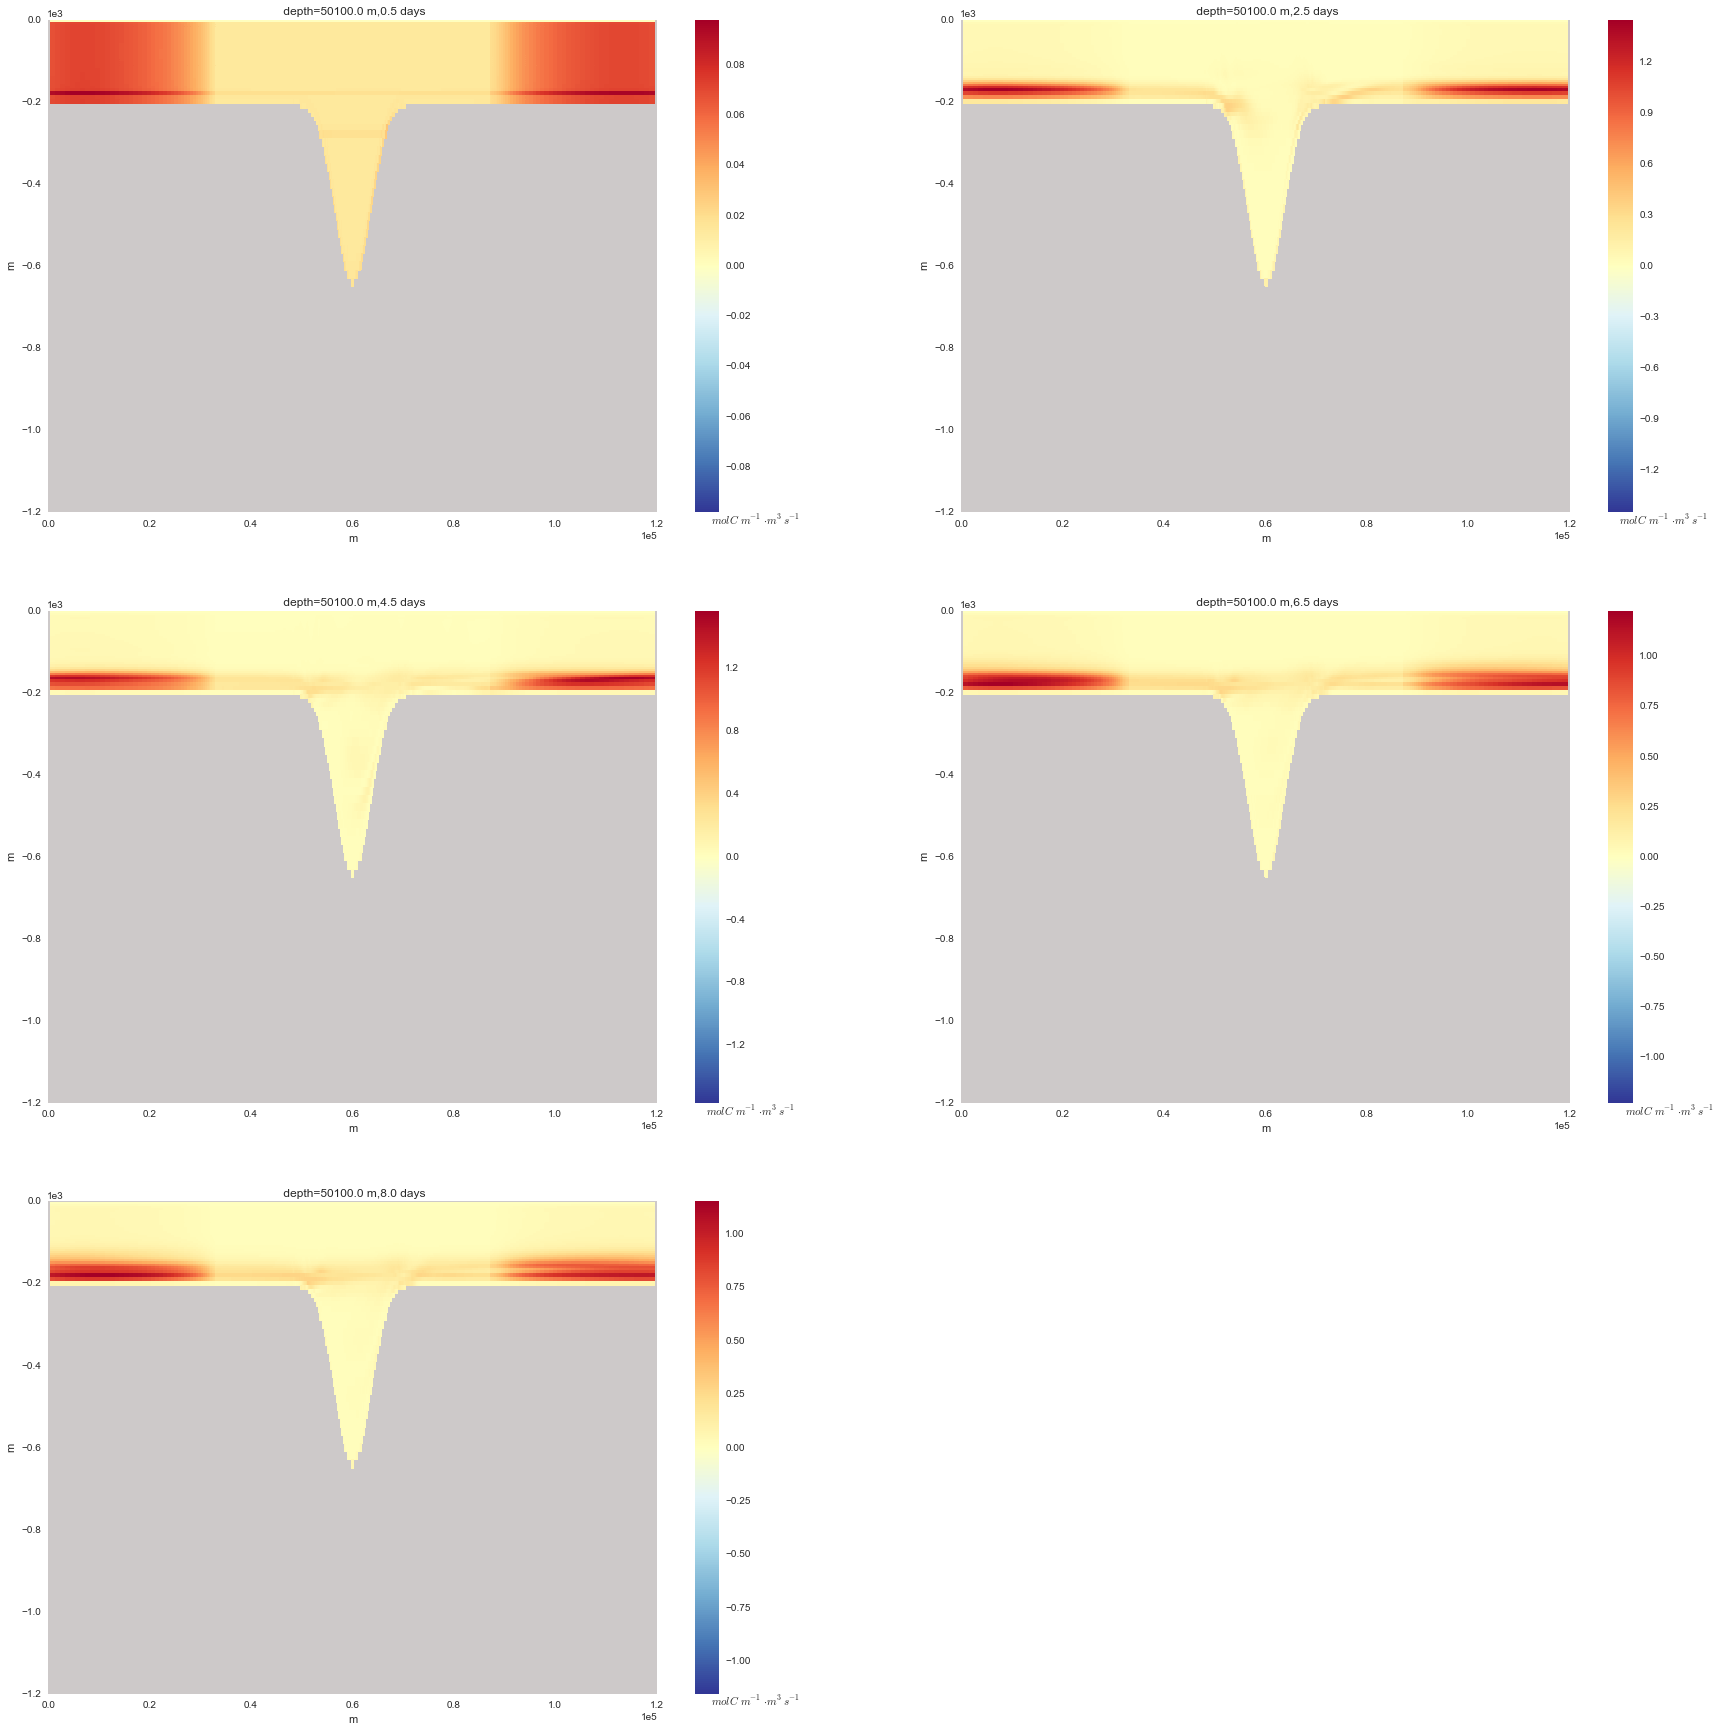

In [18]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
yindex = 190
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNYAcross(time,figSize, numCols,numRows,DFrITR01, MaskC, yindex,z,bathy,xc,yc,unitsTr)

In [19]:
# 3D diffusivity run

#FluxTH3D = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz_FluxDiagnostics/run01/FluxTHGlob.nc'
#FluxSLT3D = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz_FluxDiagnostics/run01/FluxSLTGlob.nc'
FluxTR013D = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz_FluxDiagnostics/run01/FluxTR01Glob.nc'
FluxOut3D = Dataset(FluxTR013D)



In [20]:
#Vertical Fluxes
#ADVrTH = rout.getField(FluxTH,'ADVr_TH') # Vertical advective transport THETA
#ADVrSLT = rout.getField(FluxSLT,'ADVr_SLT') # Vertical advective transport 
ADVrTR013D = rout.getField(FluxTR013D,'ADVrTr01') # Vertical advective transport 

DFrITR013D = rout.getField(FluxTR013D,'DFrITr01') # Vertical diff flux implicit
DFrETR013D = rout.getField(FluxTR013D,'DFrETr01') # Vertical diff flux implicit

WTRAC01 = rout.getField(FluxTR013D,'WTRAC01')

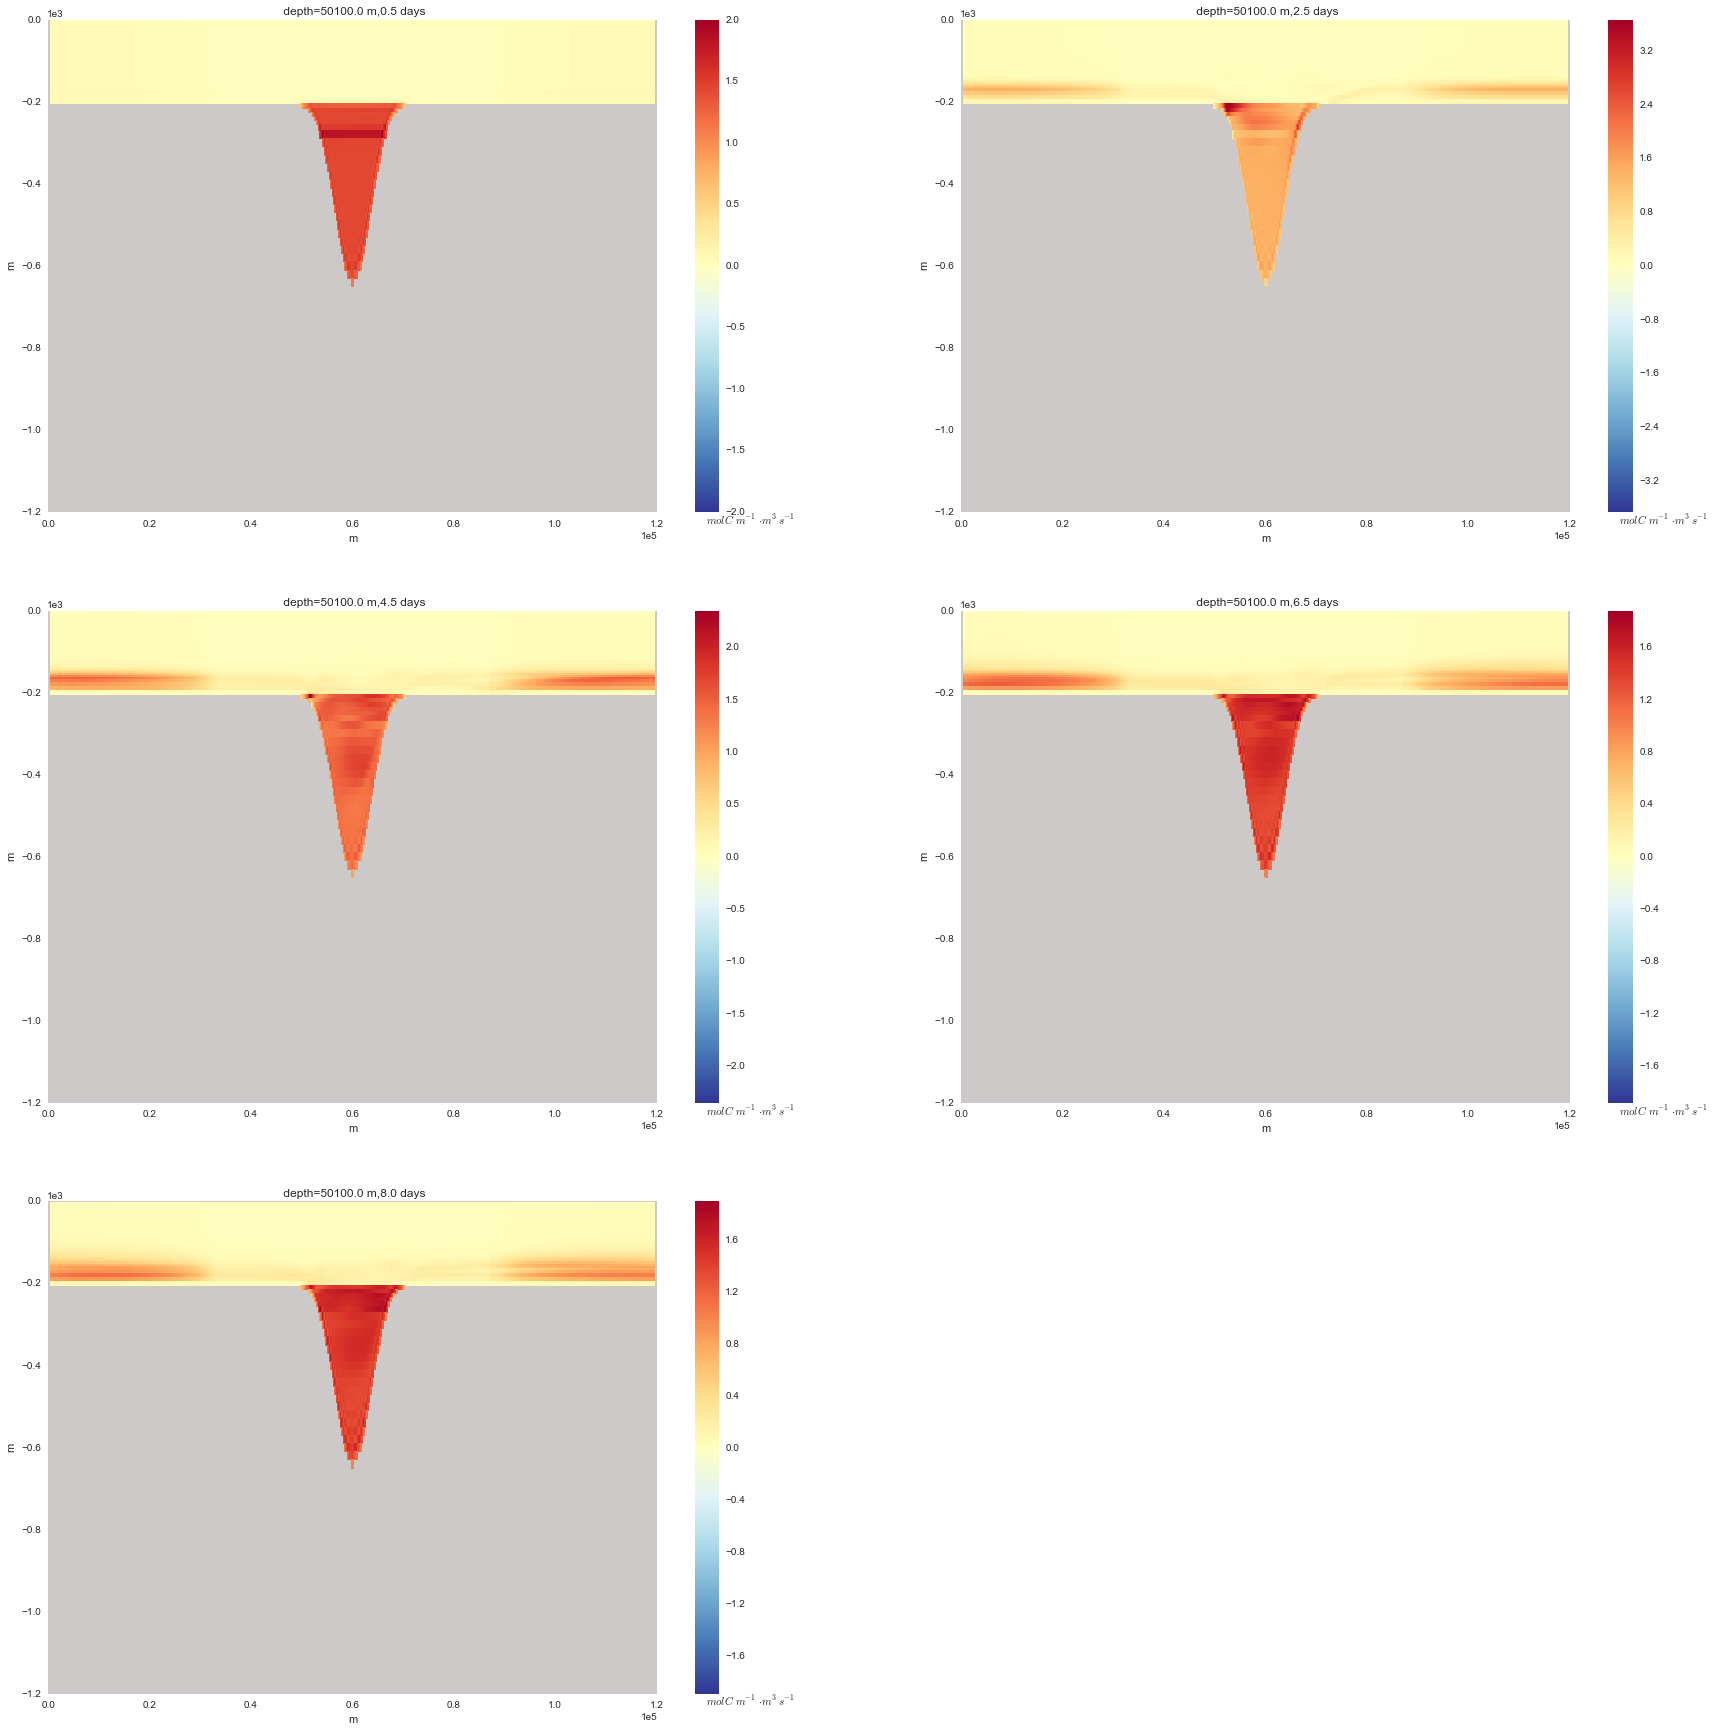

In [21]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
yindex = 190
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNYAcross(time,figSize, numCols,numRows,DFrITR013D, MaskC, yindex,z,bathy,xc,yc,unitsTr)

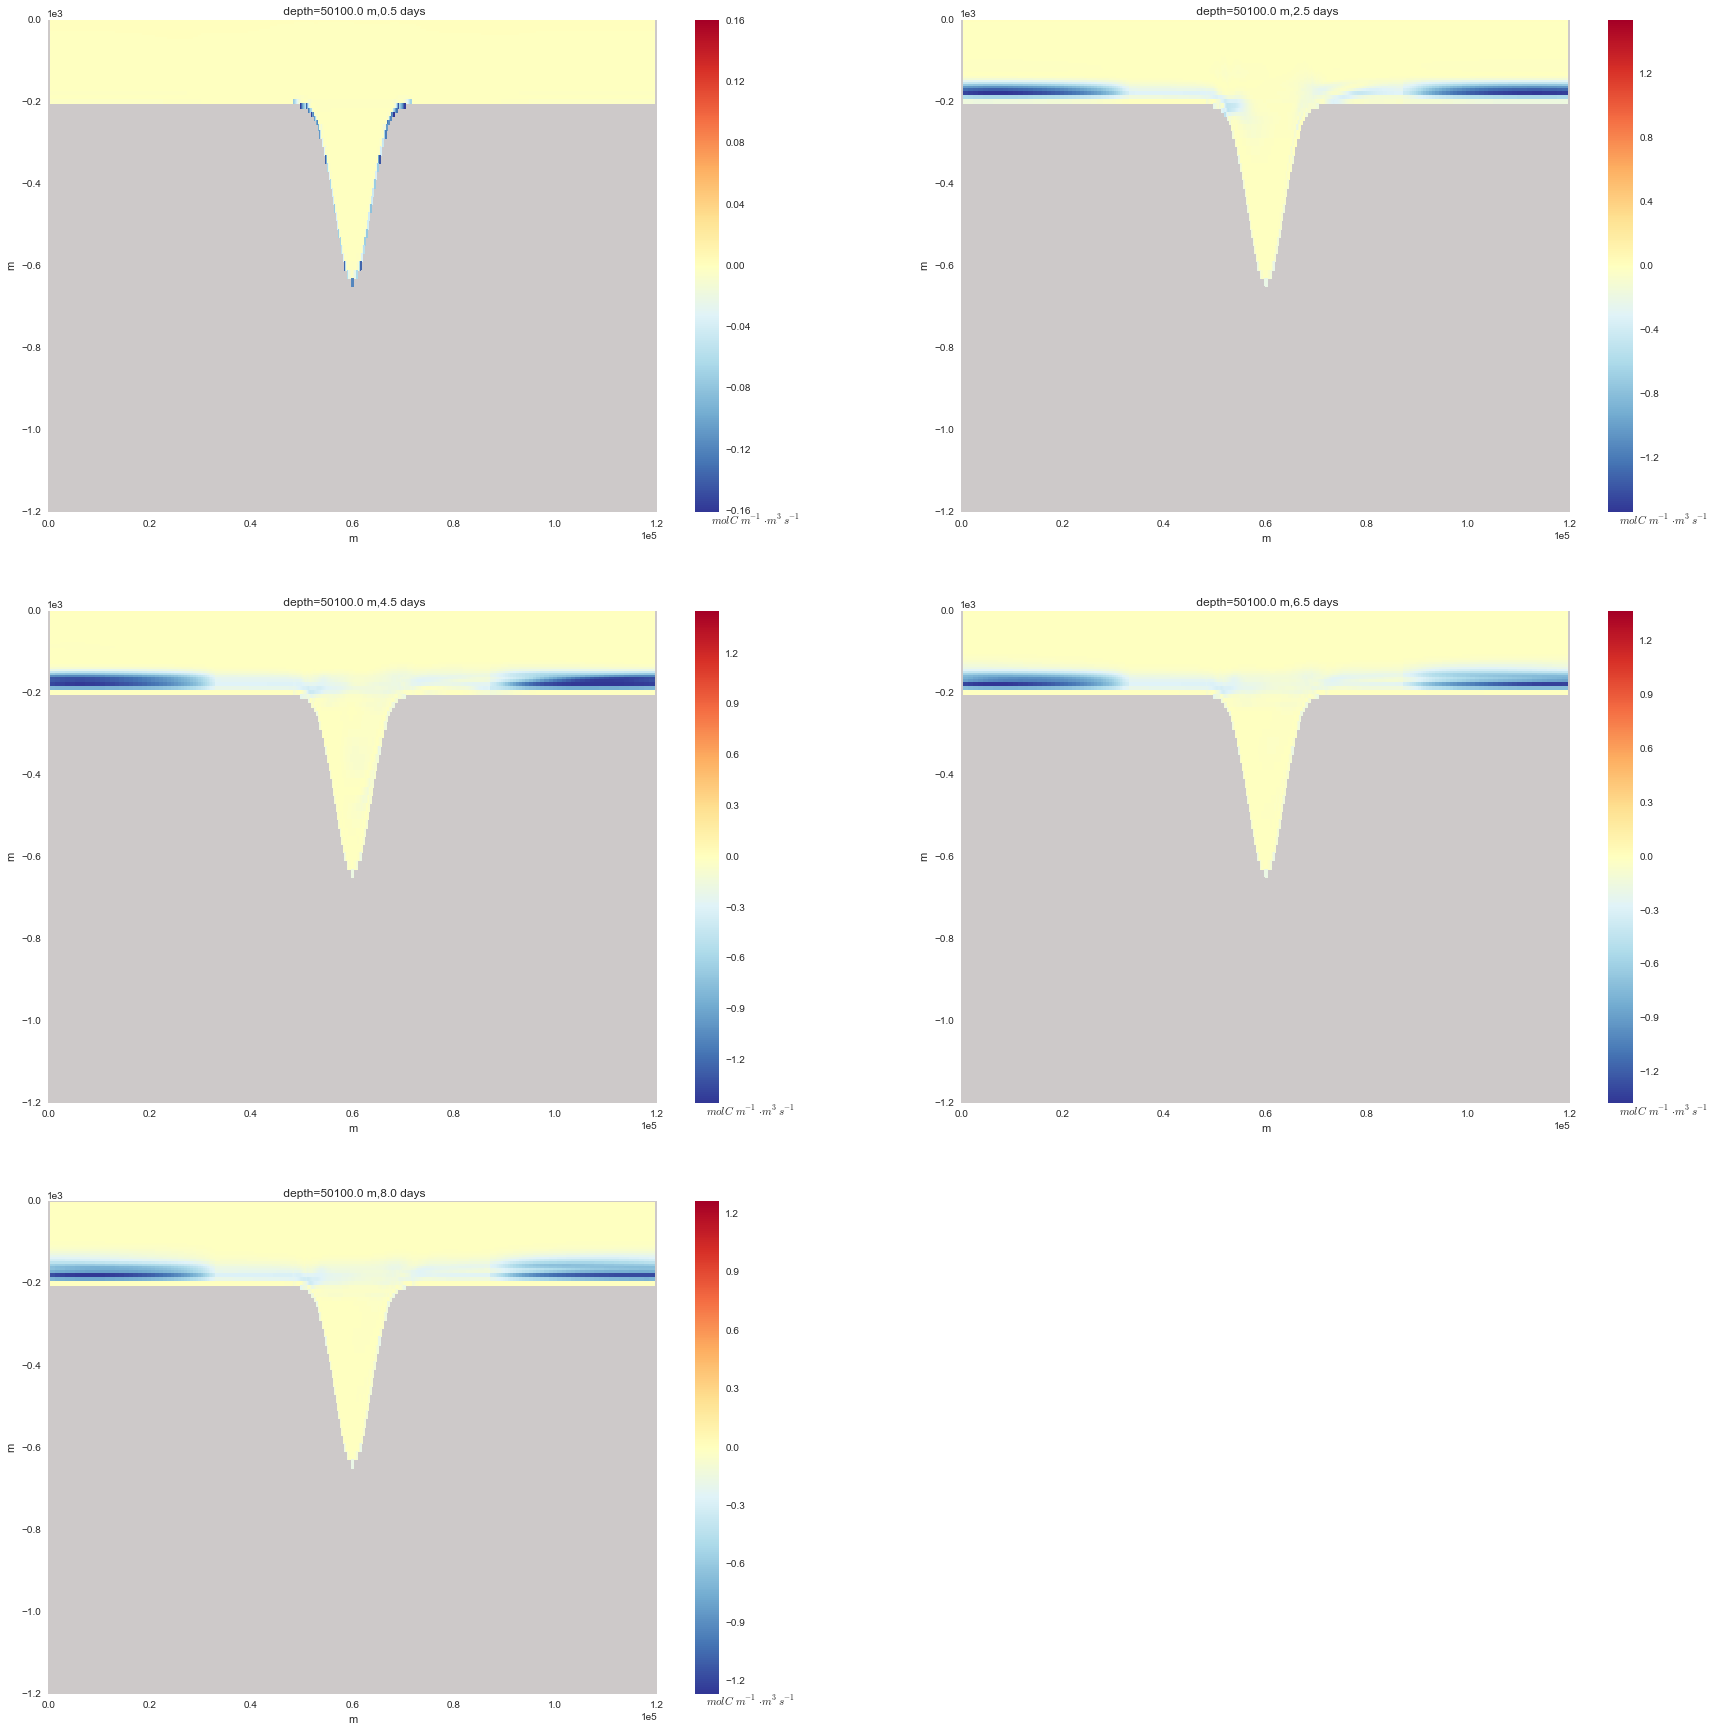

In [22]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
yindex = 190
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNYAcross(time,figSize, numCols,numRows,DFrETR013D, MaskC, yindex,z,bathy,xc,yc,unitsTr)

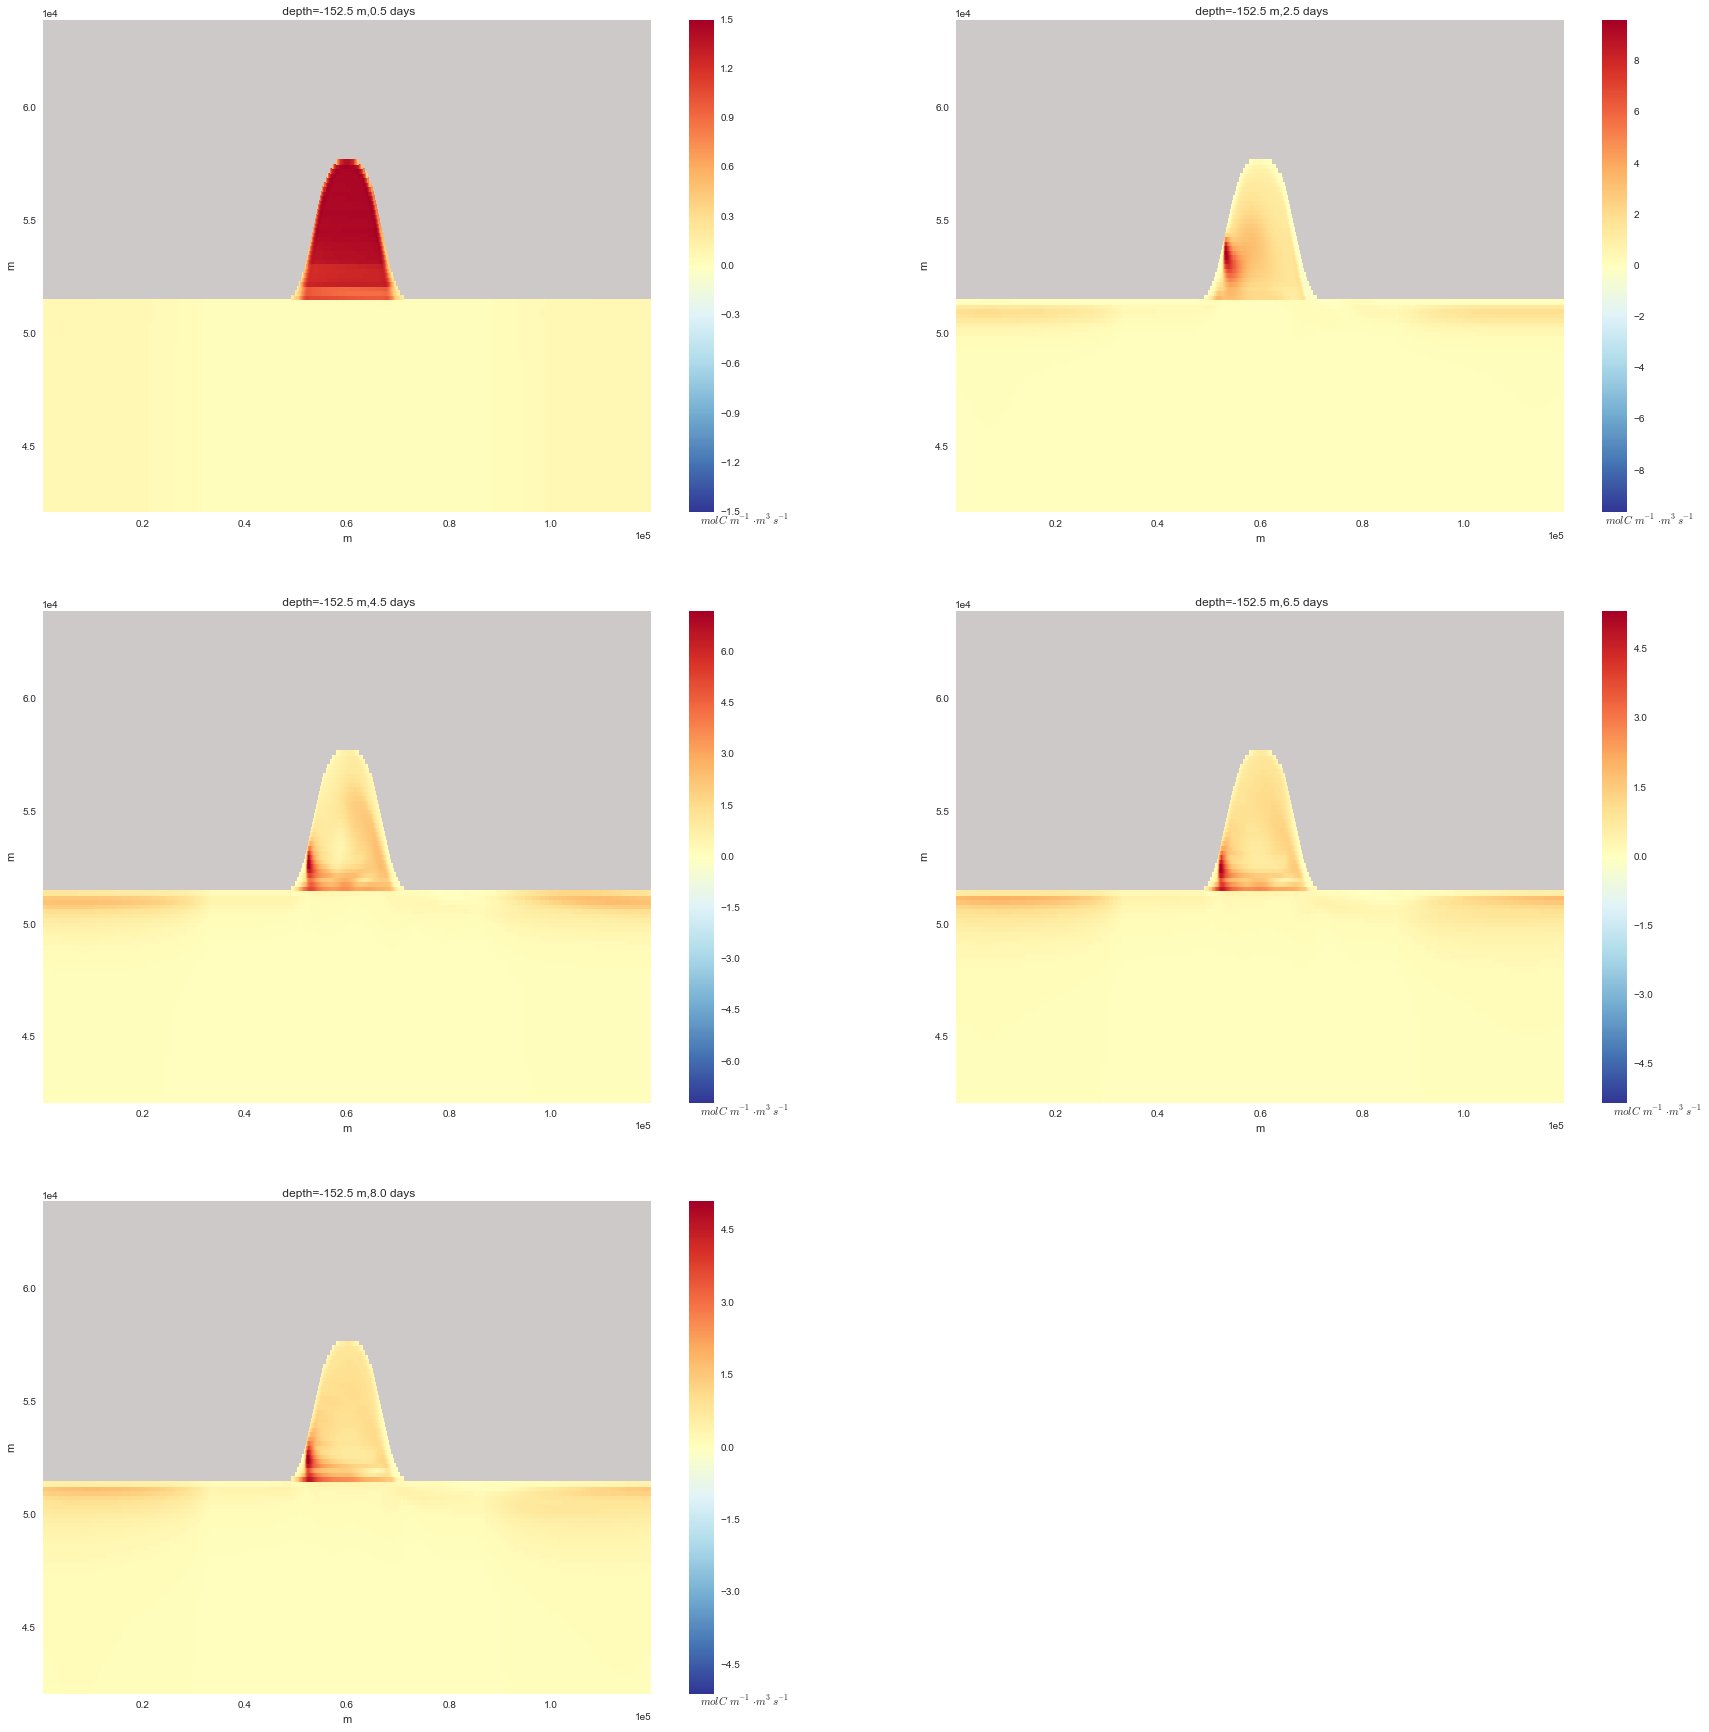

In [23]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 30
unitsTr = '$molC\ m^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,DFrITR013D, MaskC, depth,z,bathy,xc,yc,unitsTr)

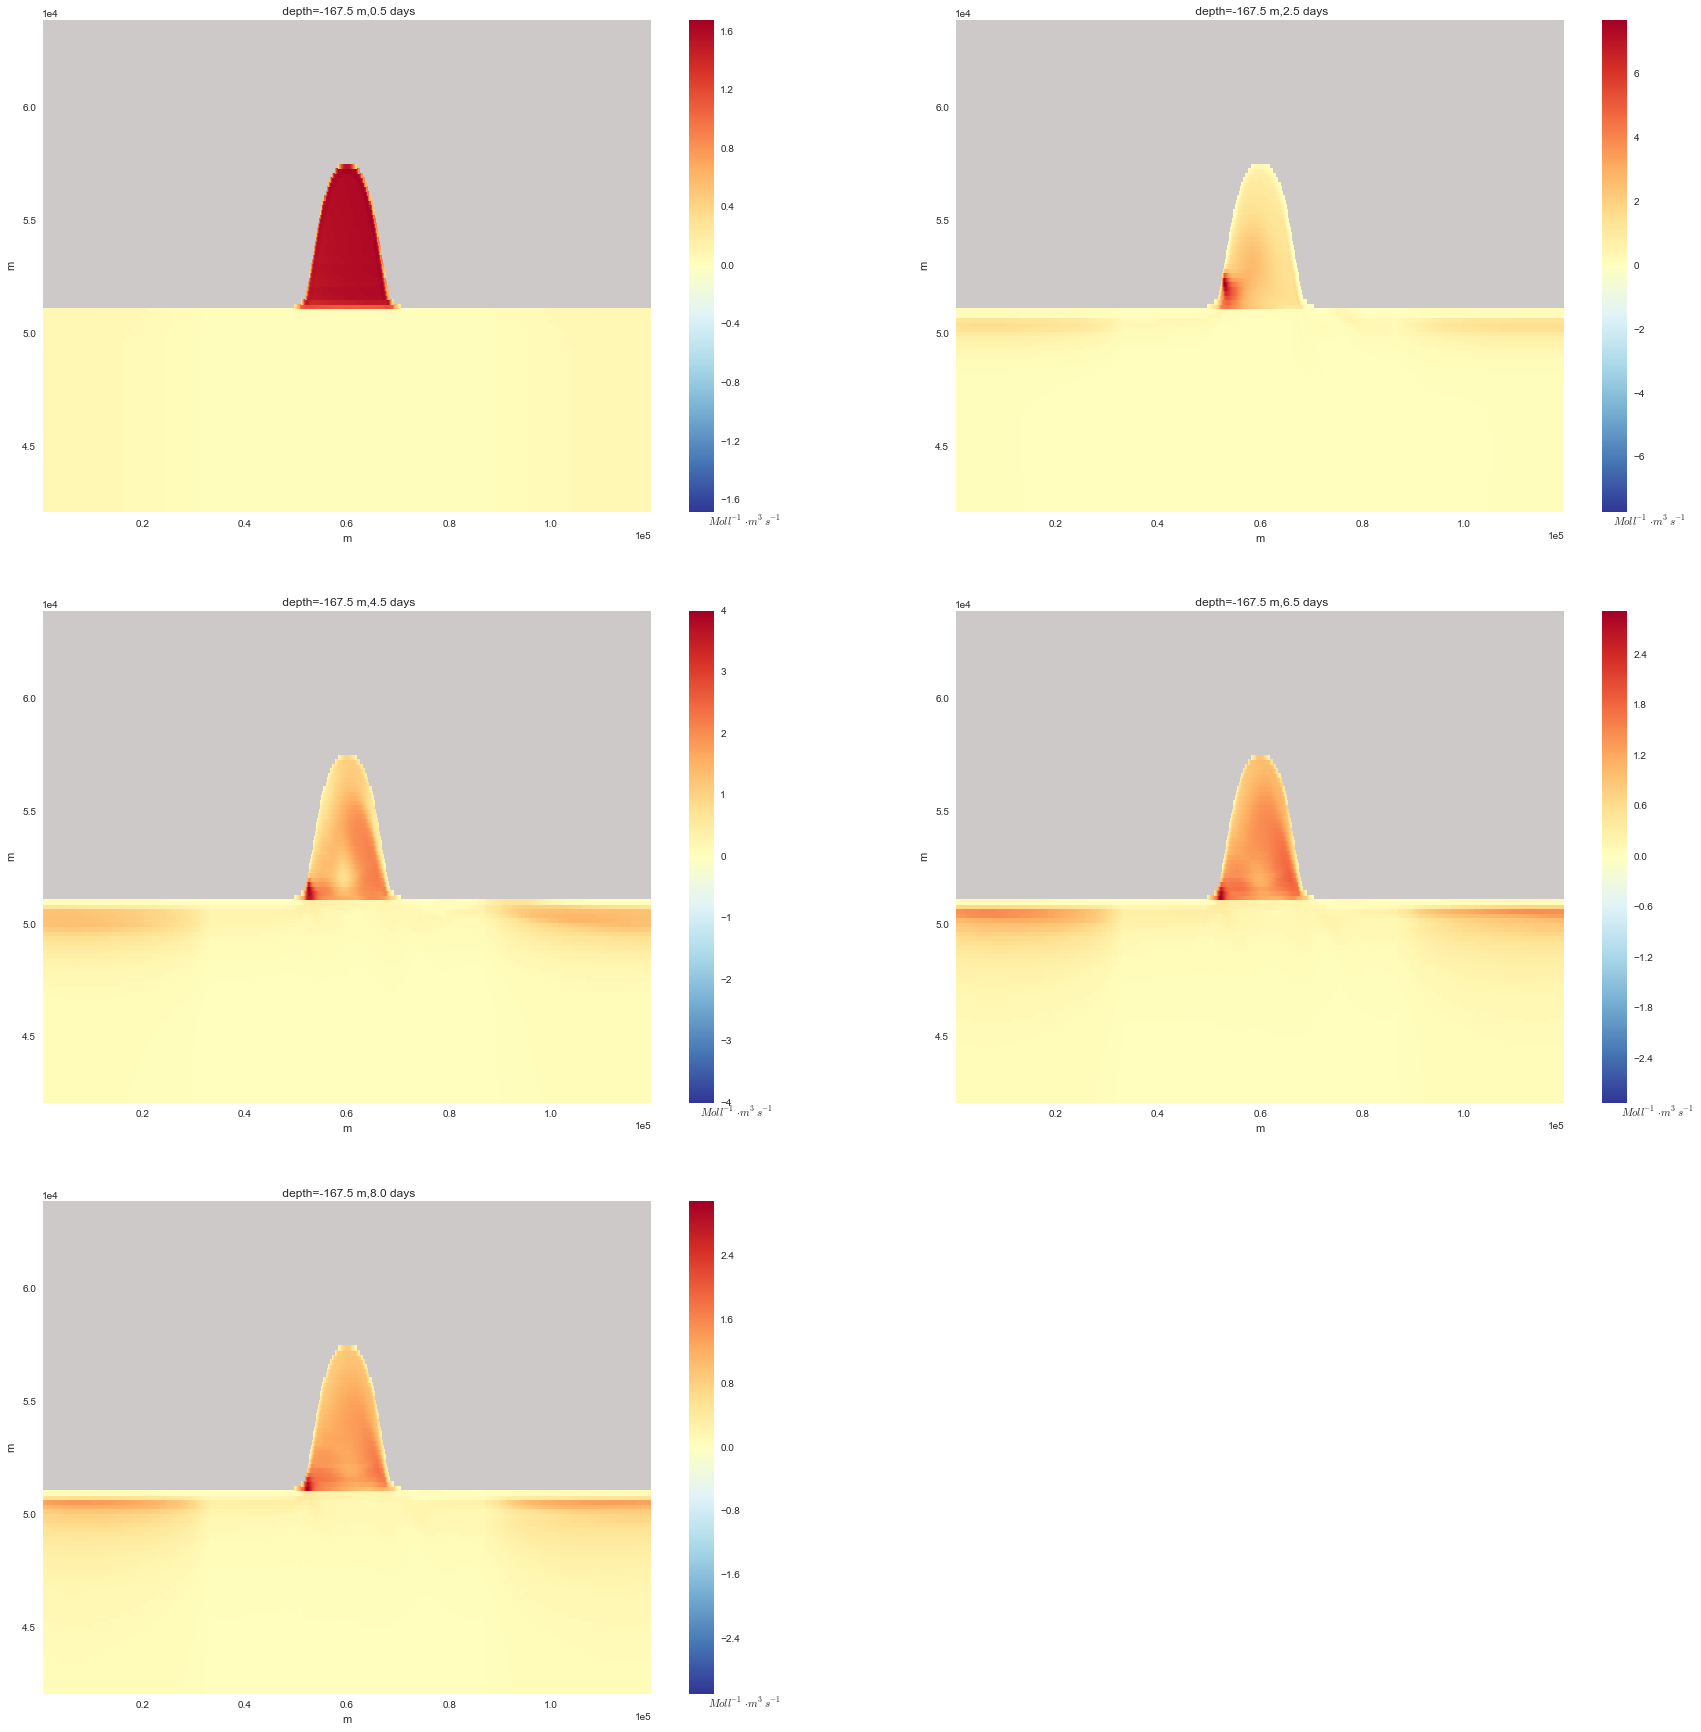

In [24]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 33
unitsTr = '$Mol l^{-1}\cdot m^3s^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,DFrITR013D, MaskC, depth,z,bathy,xc,yc,unitsTr)

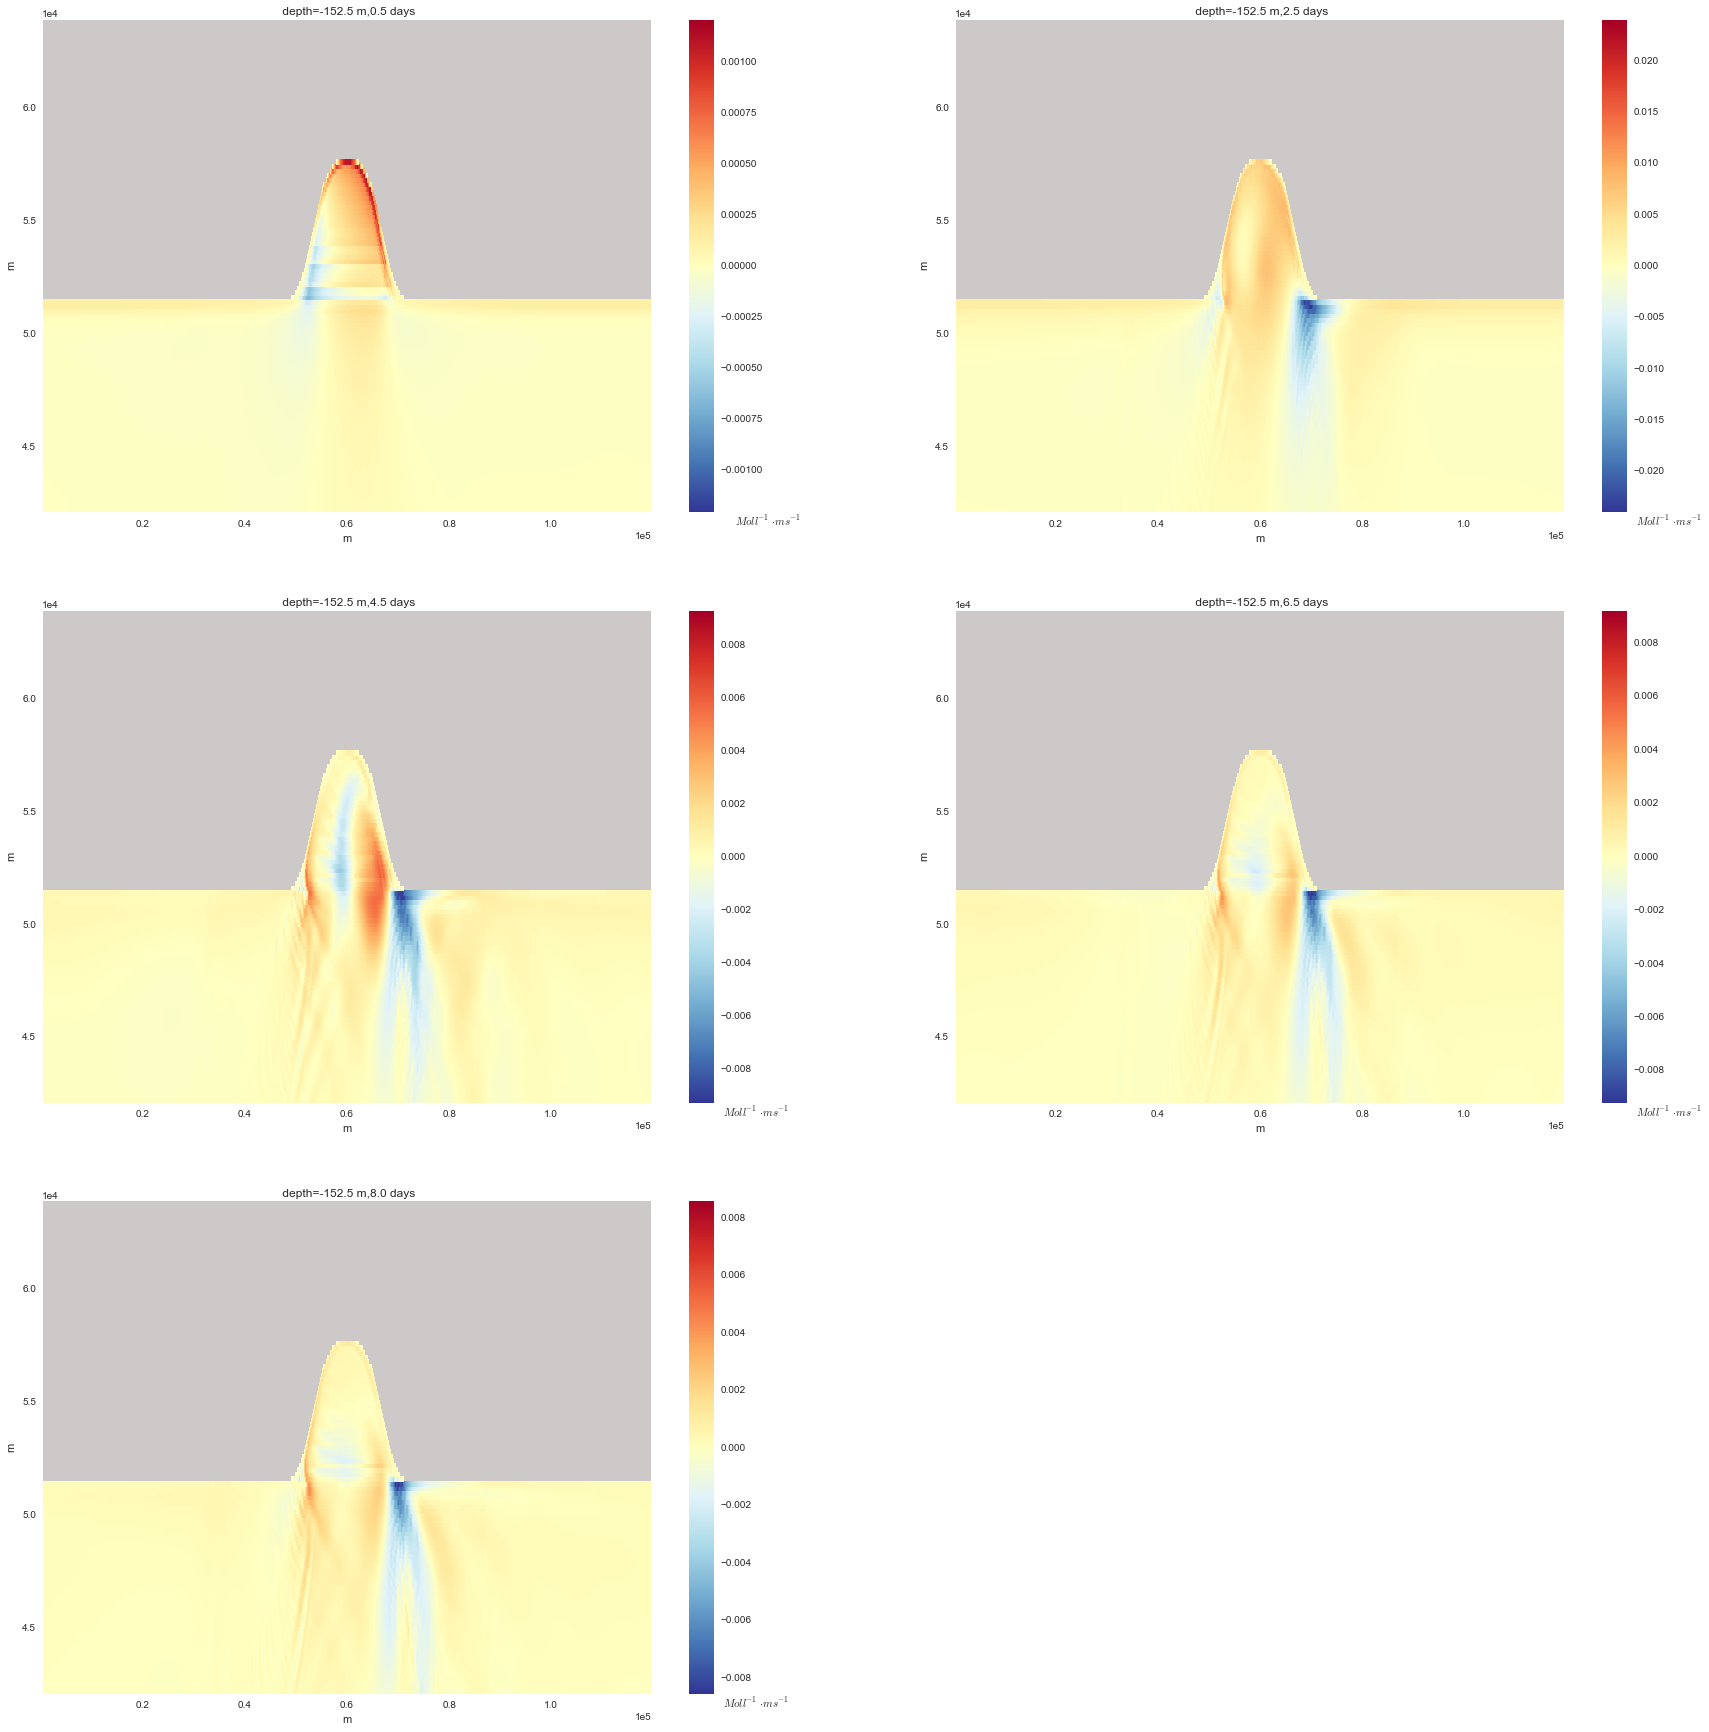

In [25]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
depth = 30
unitsTr = '$Mol l^{-1}\cdot ms^{-1}$'

pcolorFluxVCNY(time,figSize, numCols,numRows,WTRAC01, MaskC, depth,z,bathy,xc,yc,unitsTr)

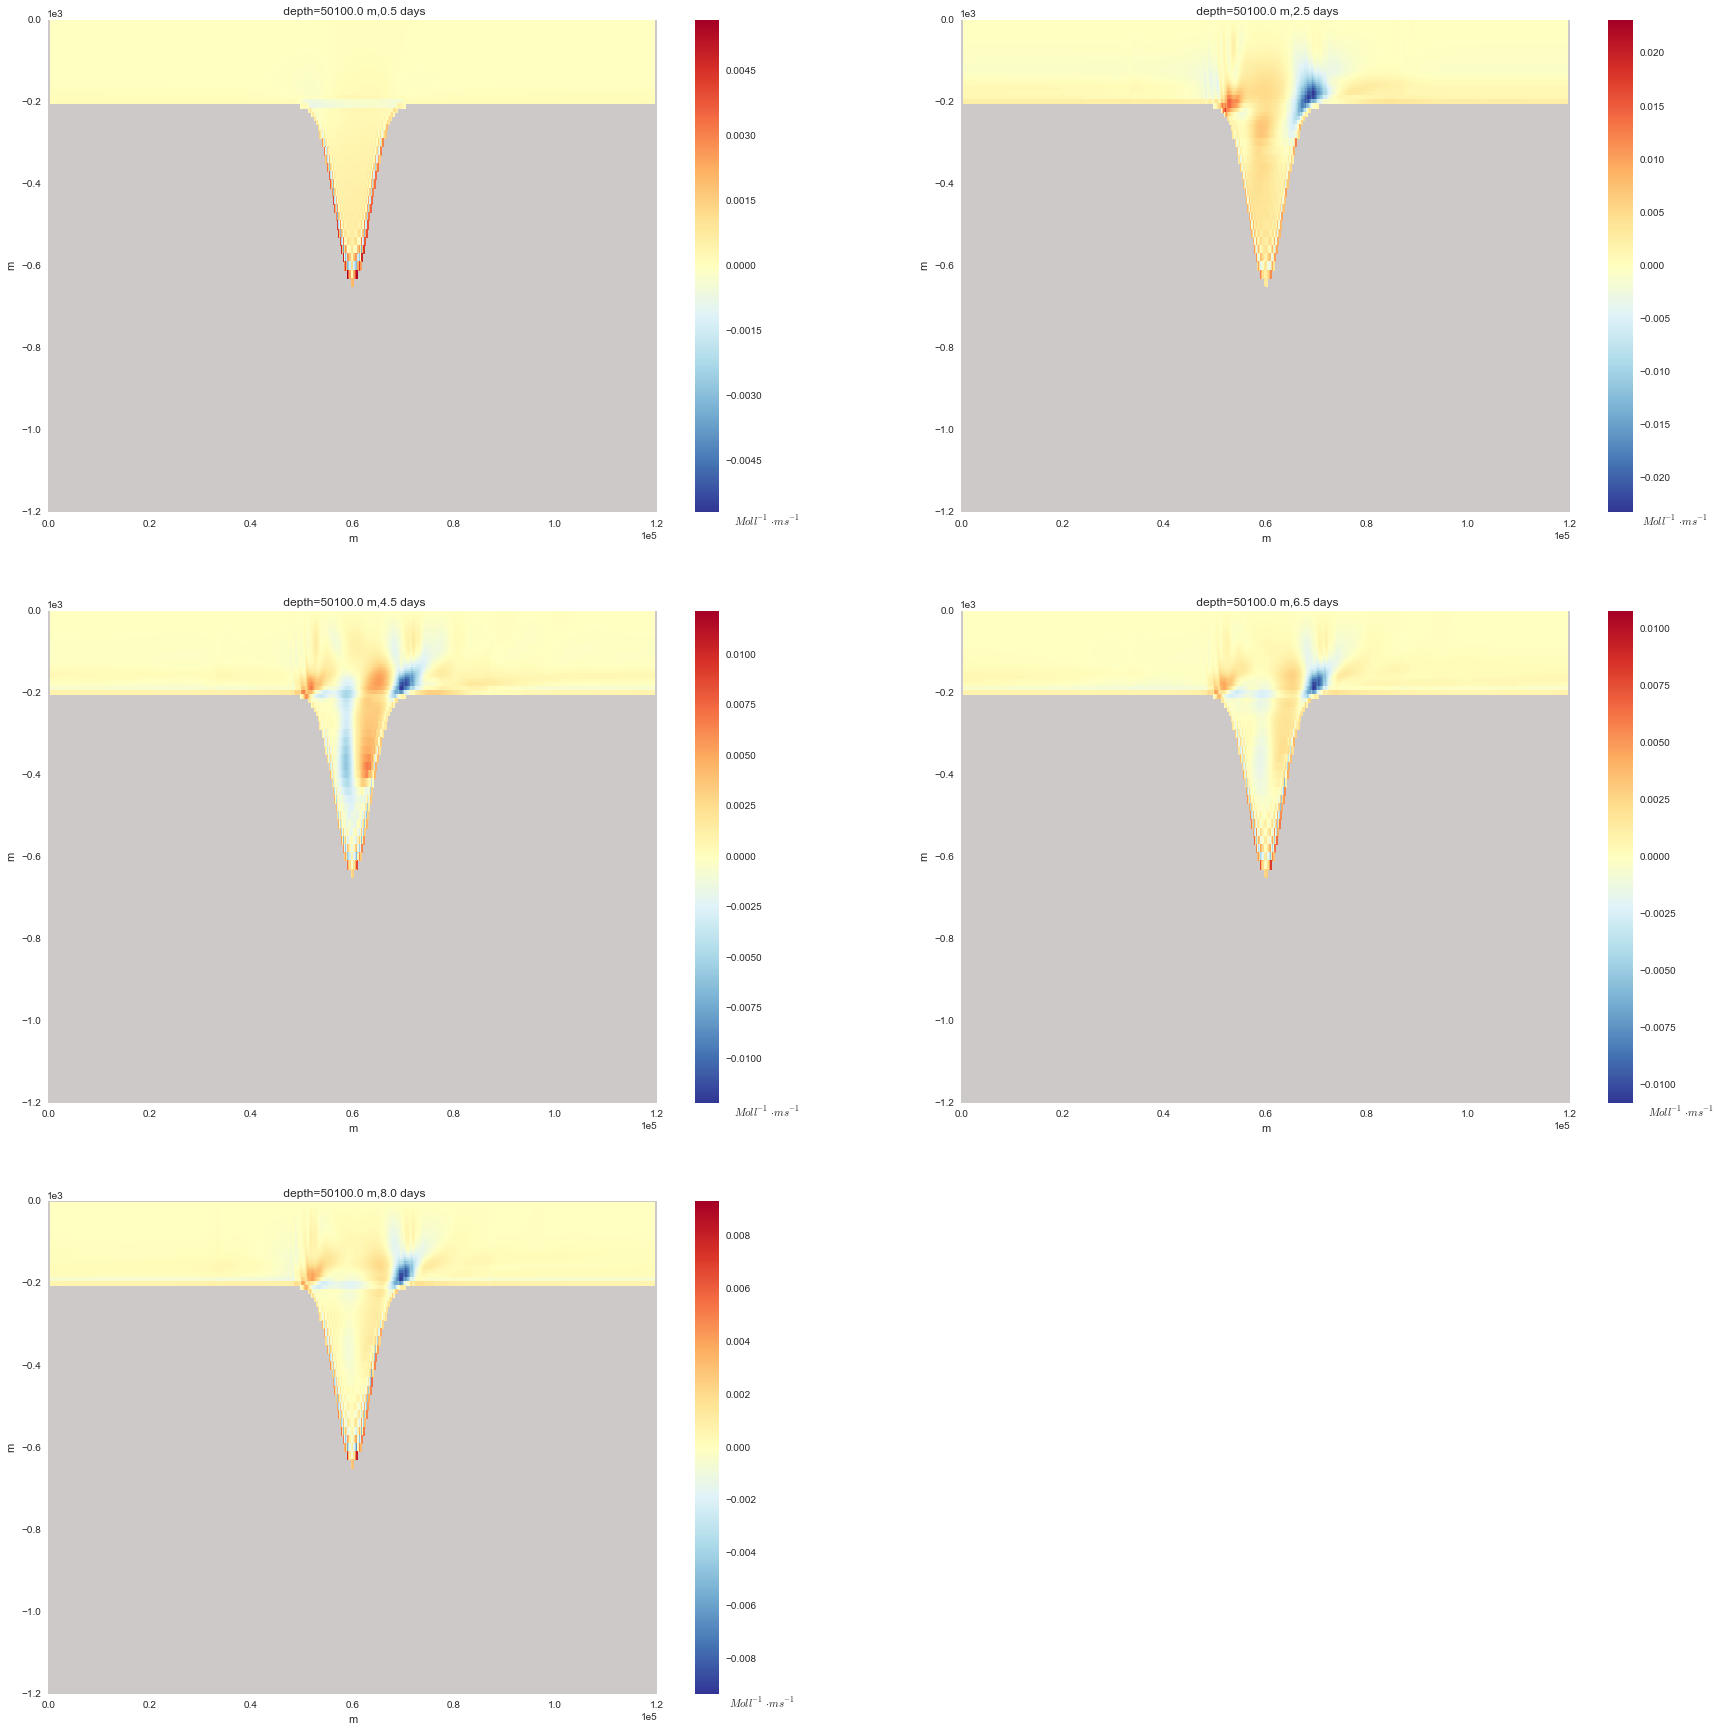

In [26]:
time = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 2
numRows = 3
yindex = 190
unitsTr = '$Mol l^{-1}\cdot ms^{-1}$'

pcolorFluxVCNYAcross(time,figSize, numCols,numRows,WTRAC01, MaskC, yindex,z,bathy,xc,yc,unitsTr)